In [220]:
import sys
sys.path.append("../")
from src import prepro, metrics, run, setup
import src.models.factory as model_factory
import config
import torch

import numpy as np
from src.utils import models
import os.path as osp
import pandas as pd

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from src.utils.data_processing import *

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

window_size = 8
predict_at = 16
full = True

tgt_intensity_cat_train = torch.LongTensor(np.load('../data/y_train_intensity_cat_1980_34_20_120_w' + str(window_size) + '_at_' + str(predict_at) + '.npy',
                                      allow_pickle=True))
tgt_intensity_cat_test = torch.LongTensor(np.load('../data/y_test_intensity_cat_1980_34_20_120_w' + str(window_size) + '_at_' + str(predict_at) + '.npy',
                                     allow_pickle=True))

tgt_intensity_train = torch.Tensor(np.load('../data/y_train_intensity_1980_34_20_120_w' + str(window_size) + '_at_' + str(predict_at) + '.npy',
                                  allow_pickle=True))
tgt_intensity_test = torch.Tensor(np.load('../data/y_test_intensity_1980_34_20_120_w' + str(window_size) + '_at_' + str(predict_at) + '.npy',
                                 allow_pickle=True))

tgt_intensity_cat_baseline_train = torch.LongTensor(np.load('../data/y_train_intensity_cat_baseline_1980_34_20_120_w' + str(window_size) + '_at_' + str(predict_at) + '.npy',  allow_pickle = True))
tgt_intensity_cat_baseline_test = torch.LongTensor(np.load('../data/y_test_intensity_cat_baseline_1980_34_20_120_w' + str(window_size) + '_at_' + str(predict_at) + '.npy', allow_pickle=True))

tgt_displacement_train = torch.Tensor(np.load('../data/y_train_displacement_1980_34_20_120_w' + str(window_size) + '_at_' + str(predict_at) + '.npy',
                                     allow_pickle=True))
tgt_displacement_test = torch.Tensor(np.load('../data/y_test_displacement_1980_34_20_120_w' + str(window_size) + '_at_' + str(predict_at) + '.npy',
                                    allow_pickle=True))

tgt_displacement_train_unst = torch.Tensor(np.load('../data/y_train_displacement_1980_34_20_120_w' + str(window_size) + '_at_' + str(predict_at) + '.npy',
                                     allow_pickle=True))
tgt_displacement_test_unst = torch.Tensor(np.load('../data/y_test_displacement_1980_34_20_120_w' + str(window_size) + '_at_' + str(predict_at) + '.npy',
                                    allow_pickle=True))

In [221]:
#X_test_baseline = pd.DataFrame(np.load('../data/X_test_stat_1980_34_20_120_forecast_24_2012_v2_w' + str(window_size) + '_at_' + str(predict_at) + '.npy', allow_pickle=True))
X_test_baseline = pd.DataFrame(np.load('../data/X_test_stat_1980_34_20_120_forecast_48_2012_v2_w' + str(window_size) + '_at_' + str(predict_at) + '.npy', allow_pickle=True))


#names_baselines = ['YEAR', 'MONTH', 'DAY', 'HOUR', 'LAT', 'LON', 'WMO_WIND', 'WMO_PRES', 'DIST2LAND', 'STORM_SPEED', 'cos_day', 'sin_day', 'COS_STORM_DIR', 'SIN_STORM_DIR', 'COS_LAT', 'SIN_LAT', 'COS_LON', 'SIN_LON', 'wind_category', 'GFDL_24_lat', 'GFDL_24_lon', 'GFDL_24_vmax', 'GFDL_24_mslp', 'GFDL_24_COS_LAT', 'GFDL_24_SIN_LAT', 'GFDL_24_COS_LON', 'GFDL_24_SIN_LON', 'CMC_24_lat', 'CMC_24_lon', 'CMC_24_vmax', 'CMC_24_mslp', 'CMC_24_COS_LAT', 'CMC_24_SIN_LAT', 'CMC_24_COS_LON', 'CMC_24_SIN_LON', 'FSSE_24_lat', 'FSSE_24_lon', 'FSSE_24_vmax', 'FSSE_24_mslp', 'FSSE_24_COS_LAT', 'FSSE_24_SIN_LAT', 'FSSE_24_COS_LON', 'FSSE_24_SIN_LON', 'OFCL_24_lat', 'OFCL_24_lon', 'OFCL_24_vmax', 'OFCL_24_mslp', 'OFCL_24_COS_LAT', 'OFCL_24_SIN_LAT', 'OFCL_24_COS_LON', 'OFCL_24_SIN_LON', 'NGPS_24_lat', 'NGPS_24_lon', 'NGPS_24_vmax', 'NGPS_24_mslp', 'NGPS_24_COS_LAT', 'NGPS_24_SIN_LAT', 'NGPS_24_COS_LON', 'NGPS_24_SIN_LON', 'DSHP_24_lat', 'DSHP_24_lon', 'DSHP_24_vmax', 'DSHP_24_mslp', 'DSHP_24_COS_LAT', 'DSHP_24_SIN_LAT', 'DSHP_24_COS_LON', 'DSHP_24_SIN_LON', 'SHIP_24_lat', 'SHIP_24_lon', 'SHIP_24_vmax', 'SHIP_24_mslp', 'SHIP_24_COS_LAT', 'SHIP_24_SIN_LAT', 'SHIP_24_COS_LON', 'SHIP_24_SIN_LON', 'CLP5_24_lat', 'CLP5_24_lon', 'CLP5_24_vmax', 'CLP5_24_mslp', 'CLP5_24_COS_LAT', 'CLP5_24_SIN_LAT', 'CLP5_24_COS_LON', 'CLP5_24_SIN_LON', 'HWRF_24_lat', 'HWRF_24_lon', 'HWRF_24_vmax', 'HWRF_24_mslp', 'HWRF_24_COS_LAT', 'HWRF_24_SIN_LAT', 'HWRF_24_COS_LON', 'HWRF_24_SIN_LON', 'UKXI_24_lat', 'UKXI_24_lon', 'UKXI_24_vmax', 'UKXI_24_mslp', 'UKXI_24_COS_LAT', 'UKXI_24_SIN_LAT', 'UKXI_24_COS_LON', 'UKXI_24_SIN_LON', 'LBAR_24_lat', 'LBAR_24_lon', 'LBAR_24_vmax', 'LBAR_24_mslp', 'LBAR_24_COS_LAT', 'LBAR_24_SIN_LAT', 'LBAR_24_COS_LON', 'LBAR_24_SIN_LON', 'AEMN_24_lat', 'AEMN_24_lon', 'AEMN_24_vmax', 'AEMN_24_mslp', 'AEMN_24_COS_LAT', 'AEMN_24_SIN_LAT', 'AEMN_24_COS_LON', 'AEMN_24_SIN_LON', 'DISPLACEMENT_LAT_CLP5_24', 'DISPLACEMENT_LON_CLP5_24', 'DISPLACEMENT_LAT_SHIP_24', 'DISPLACEMENT_LON_SHIP_24', 'DISPLACEMENT_LAT_DSHP_24', 'DISPLACEMENT_LON_DSHP_24', 'DISPLACEMENT_LAT_LBAR_24', 'DISPLACEMENT_LON_LBAR_24', 'DISPLACEMENT_LAT_CMC_24', 'DISPLACEMENT_LON_CMC_24', 'DISPLACEMENT_LAT_NGPS_24', 'DISPLACEMENT_LON_NGPS_24', 'DISPLACEMENT_LAT_GFDL_24', 'DISPLACEMENT_LON_GFDL_24', 'DISPLACEMENT_LAT_HWRF_24', 'DISPLACEMENT_LON_HWRF_24', 'DISPLACEMENT_LAT_UKXI_24', 'DISPLACEMENT_LON_UKXI_24', 'DISPLACEMENT_LAT_FSSE_24', 'DISPLACEMENT_LON_FSSE_24', 'DISPLACEMENT_LAT_AEMN_24', 'DISPLACEMENT_LON_AEMN_24', 'DISPLACEMENT_LAT_OFCL_24', 'DISPLACEMENT_LON_OFCL_24', 'EMXI_24_lat', 'EMXI_24_lon', 'EMXI_24_vmax', 'EMXI_24_mslp', 'EMXI_24_COS_LAT', 'EMXI_24_SIN_LAT', 'EMXI_24_COS_LON', 'EMXI_24_SIN_LON', 'DISPLACEMENT_LAT_EMXI_24', 'DISPLACEMENT_LON_EMXI_24', 'GFSO_24_lat', 'GFSO_24_lon', 'GFSO_24_vmax', 'GFSO_24_mslp', 'GFSO_24_COS_LAT', 'GFSO_24_SIN_LAT', 'GFSO_24_COS_LON', 'GFSO_24_SIN_LON', 'DISPLACEMENT_LAT_GFSO_24', 'DISPLACEMENT_LON_GFSO_24', 'cat_basin_AN', 'cat_basin_EP', 'basin_NI', 'basin_SI', 'basin_SP', 'basin_WP', 'DISPLACEMENT_LAT', 'DISPLACEMENT_LON']
names_baselines = ['YEAR', 'MONTH', 'DAY', 'HOUR', 'LAT', 'LON', 'WMO_WIND', 'WMO_PRES', 'DIST2LAND', 'STORM_SPEED', 'cos_day', 'sin_day', 'COS_STORM_DIR', 'SIN_STORM_DIR', 'COS_LAT', 'SIN_LAT', 'COS_LON', 'SIN_LON', 'wind_category', 'DSHP_24_lat', 'DSHP_24_lon', 'DSHP_24_vmax', 'DSHP_24_mslp', 'DSHP_24_COS_LAT', 'DSHP_24_SIN_LAT', 'DSHP_24_COS_LON', 'DSHP_24_SIN_LON', 'OFCL_24_lat', 'OFCL_24_lon', 'OFCL_24_vmax', 'OFCL_24_mslp', 'OFCL_24_COS_LAT', 'OFCL_24_SIN_LAT', 'OFCL_24_COS_LON', 'OFCL_24_SIN_LON', 'UKXI_24_lat', 'UKXI_24_lon', 'UKXI_24_vmax', 'UKXI_24_mslp', 'UKXI_24_COS_LAT', 'UKXI_24_SIN_LAT', 'UKXI_24_COS_LON', 'UKXI_24_SIN_LON', 'CMC_24_lat', 'CMC_24_lon', 'CMC_24_vmax', 'CMC_24_mslp', 'CMC_24_COS_LAT', 'CMC_24_SIN_LAT', 'CMC_24_COS_LON', 'CMC_24_SIN_LON', 'SHIP_24_lat', 'SHIP_24_lon', 'SHIP_24_vmax', 'SHIP_24_mslp', 'SHIP_24_COS_LAT', 'SHIP_24_SIN_LAT', 'SHIP_24_COS_LON', 'SHIP_24_SIN_LON', 'FSSE_24_lat', 'FSSE_24_lon', 'FSSE_24_vmax', 'FSSE_24_mslp', 'FSSE_24_COS_LAT', 'FSSE_24_SIN_LAT', 'FSSE_24_COS_LON', 'FSSE_24_SIN_LON', 'CLP5_24_lat', 'CLP5_24_lon', 'CLP5_24_vmax', 'CLP5_24_mslp', 'CLP5_24_COS_LAT', 'CLP5_24_SIN_LAT', 'CLP5_24_COS_LON', 'CLP5_24_SIN_LON', 'AEMN_24_lat', 'AEMN_24_lon', 'AEMN_24_vmax', 'AEMN_24_mslp', 'AEMN_24_COS_LAT', 'AEMN_24_SIN_LAT', 'AEMN_24_COS_LON', 'AEMN_24_SIN_LON', 'LBAR_24_lat', 'LBAR_24_lon', 'LBAR_24_vmax', 'LBAR_24_mslp', 'LBAR_24_COS_LAT', 'LBAR_24_SIN_LAT', 'LBAR_24_COS_LON', 'LBAR_24_SIN_LON', 'GFDL_24_lat', 'GFDL_24_lon', 'GFDL_24_vmax', 'GFDL_24_mslp', 'GFDL_24_COS_LAT', 'GFDL_24_SIN_LAT', 'GFDL_24_COS_LON', 'GFDL_24_SIN_LON', 'HWRF_24_lat', 'HWRF_24_lon', 'HWRF_24_vmax', 'HWRF_24_mslp', 'HWRF_24_COS_LAT', 'HWRF_24_SIN_LAT', 'HWRF_24_COS_LON', 'HWRF_24_SIN_LON', 'NGPS_24_lat', 'NGPS_24_lon', 'NGPS_24_vmax', 'NGPS_24_mslp', 'NGPS_24_COS_LAT', 'NGPS_24_SIN_LAT', 'NGPS_24_COS_LON', 'NGPS_24_SIN_LON', 'DISPLACEMENT_LAT_CLP5_24', 'DISPLACEMENT_LON_CLP5_24', 'DISPLACEMENT_LAT_SHIP_24', 'DISPLACEMENT_LON_SHIP_24', 'DISPLACEMENT_LAT_DSHP_24', 'DISPLACEMENT_LON_DSHP_24', 'DISPLACEMENT_LAT_LBAR_24', 'DISPLACEMENT_LON_LBAR_24', 'DISPLACEMENT_LAT_CMC_24', 'DISPLACEMENT_LON_CMC_24', 'DISPLACEMENT_LAT_NGPS_24', 'DISPLACEMENT_LON_NGPS_24', 'DISPLACEMENT_LAT_GFDL_24', 'DISPLACEMENT_LON_GFDL_24', 'DISPLACEMENT_LAT_HWRF_24', 'DISPLACEMENT_LON_HWRF_24', 'DISPLACEMENT_LAT_UKXI_24', 'DISPLACEMENT_LON_UKXI_24', 'DISPLACEMENT_LAT_FSSE_24', 'DISPLACEMENT_LON_FSSE_24', 'DISPLACEMENT_LAT_AEMN_24', 'DISPLACEMENT_LON_AEMN_24', 'DISPLACEMENT_LAT_OFCL_24', 'DISPLACEMENT_LON_OFCL_24', 'EMXI_24_lat', 'EMXI_24_lon', 'EMXI_24_vmax', 'EMXI_24_mslp', 'EMXI_24_COS_LAT', 'EMXI_24_SIN_LAT', 'EMXI_24_COS_LON', 'EMXI_24_SIN_LON', 'DISPLACEMENT_LAT_EMXI_24', 'DISPLACEMENT_LON_EMXI_24', 'GFSO_24_lat', 'GFSO_24_lon', 'GFSO_24_vmax', 'GFSO_24_mslp', 'GFSO_24_COS_LAT', 'GFSO_24_SIN_LAT', 'GFSO_24_COS_LON', 'GFSO_24_SIN_LON', 'DISPLACEMENT_LAT_GFSO_24', 'DISPLACEMENT_LON_GFSO_24', 'cat_basin_AN', 'cat_basin_EP', 'basin_NI', 'basin_SI', 'basin_SP', 'basin_WP', 'DISPLACEMENT_LAT', 'DISPLACEMENT_LON']
names_all_baselines = names_baselines * 8#args.window_size

for i in range(len(names_all_baselines)):
    names_all_baselines[i] += '_' + str(i // 167)

X_test_baseline.columns = names_all_baselines

In [222]:
########## PREPARING DATA FOR XGB

X_train = np.load('../data/X_train_stat_1980_34_20_120_w' + str(window_size) + '_at_' + str(predict_at) + '.npy',
            allow_pickle=True)
X_test = np.load('../data/X_test_stat_1980_34_20_120_w' + str(window_size) + '_at_' + str(predict_at) + '.npy',
            allow_pickle=True)

names = ['LAT', 'LON', 'WMO_WIND', 'WMO_PRES', 'DIST2LAND',
         'STORM_SPEED', 'cat_cos_day', 'cat_sign_day', 'COS_STORM_DIR', 'SIN_STORM_DIR',
         'COS_LAT', 'SIN_LAT', 'COS_LON', 'SIN_LON', 'cat_storm_category', 'cat_basin_AN',
         'cat_basin_EP', 'cat_basin_NI', 'cat_basin_SA',
         'cat_basin_SI', 'cat_basin_SP', 'cat_basin_WP', 'cat_nature_DS', 'cat_nature_ET',
         'cat_nature_MX', 'cat_nature_NR', 'cat_nature_SS', 'cat_nature_TS',
         'STORM_DISPLACEMENT_X', 'STORM_DISPLACEMENT_Y']

names_all = names * window_size

for i in range(len(names_all)):
    names_all[i] += '_' + str(i // 30)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.columns = names_all
X_test.columns = names_all

cols = [c for c in X_train.columns if c.lower()[-2:] == '_0' or c.lower()[:3] != 'cat']

X_train = X_train[cols]
X_test = X_test[cols]

In [223]:
#X_train_embed = np.load('../data/embeddings/X_train_embeds_1980_34_20_120_results8_16_20_44_28.npy', allow_pickle = True)
#X_test_embed = np.load('../data/embeddings/X_test_embeds_1980_34_20_120_results8_16_20_44_28.npy', allow_pickle = True)
#X_train_embed = np.load('../data/embeddings/X_train_embed_1980_34_20_120_intensity.npy', allow_pickle = True)
#X_test_embed = np.load('../data/embeddings/X_test_embed_1980_34_20_120_intensity.npy', allow_pickle = True)

#48
#X_train_embed = np.load('../data/embeddings/X_train_embed_1980_34_20_120_intensity_48.npy', allow_pickle = True)
#X_test_embed = np.load('../data/embeddings/X_test_embed_1980_34_20_120_intensity_48.npy', allow_pickle = True)

X_train_embed = np.load('../data/embeddings/X_train_embed_1980_34_20_120_track_48.npy', allow_pickle = True)
X_test_embed = np.load('../data/embeddings/X_test_embed_1980_34_20_120_track_48.npy', allow_pickle = True)

X_train_total = np.concatenate((X_train, X_train_embed), axis = 1)
X_test_total = np.concatenate((X_test, X_test_embed), axis = 1)

In [224]:
#X_test_baseline = X_test_baseline[30:]
n = X_test_baseline.shape[0]
X_test_total = X_test_total[-n:]
#tgt_intensity_test = tgt_intensity_test[-n:]
X_test = X_test[-n:]
X_test_embed = X_test_embed[-n:]
tgt_displacement_test = tgt_displacement_test[-n:]
m = 14512

if full:
    tgt_displacement_train = np.concatenate((tgt_displacement_train, tgt_displacement_test[:m]), axis = 0)
    X_train = pd.concat((X_train, X_test[:m]), axis = 0)
    X_train_embed = np.concatenate((X_train_embed, X_test_embed[:m]), axis = 0)
    X_train_total = np.concatenate((X_train_total, X_test_total[:m]), axis = 0)

In [225]:
###TRACK
mean_dx = tgt_displacement_train[:,0].mean()
std_dx = tgt_displacement_train[:,0].std()
tgt_displacement_train[:,0] = (tgt_displacement_train[:,0] - mean_dx)/std_dx
tgt_displacement_test[:,0] = (tgt_displacement_test[:,0] - mean_dx)/std_dx
std_dx = float(std_dx)
mean_dx = float(mean_dx)

mean_dy = tgt_displacement_train[:,1].mean()
std_dy = tgt_displacement_train[:,1].std()
tgt_displacement_train[:,1] = (tgt_displacement_train[:,1] - mean_dy)/std_dy
tgt_displacement_test[:,1] = (tgt_displacement_test[:,1] - mean_dy)/std_dy
std_dy = float(std_dy)
mean_dy = float(mean_dy)

In [30]:
index = X_train[np.round(X_train['WMO_WIND_7']*1000%10, decimals = 2) == 0].index

In [32]:
X_train.shape

(104651, 128)

In [33]:
X_train = X_train[np.round(X_train['WMO_WIND_7']*1000%10, decimals = 2) == 0].reset_index()

In [34]:
X_train_total = X_train_total[index]
tgt_displacement_train = tgt_displacement_train[index]
X_train_embed = X_train_embed[index]

In [3]:
xgb2 = XGBRegressor(max_depth=6, n_estimators=140, learning_rate = 0.07, subsample = 0.7, min_child_weight = 5)
xgb2.fit(X_train, tgt_intensity_train)
print("MAE intensity: ", mean_absolute_error(np.array(tgt_intensity_test)*std_+mean_, np.array(xgb2.predict(X_test))*std_+mean_))

xgb = XGBRegressor(max_depth=8, n_estimators = 150, learning_rate = 0.07, subsample = 0.7, min_child_weight = 1)
xgb.fit(X_train_total, tgt_intensity_train)
print("MAE intensity: ", mean_absolute_error(np.array(tgt_intensity_test)*std_+mean_, np.array(xgb.predict(X_test_total))*std_+mean_))

MAE intensity:  7.8533998
MAE intensity:  7.4758453


In [81]:
xgb = XGBRegressor(max_depth=8, n_estimators = 150, learning_rate = 0.07, subsample = 0.7, min_child_weight = 1)
xgb.fit(X_train_total, tgt_intensity_train)
print("MAE intensity: ", mean_absolute_error(np.array(tgt_intensity_test)*std_+mean_, np.array(xgb.predict(X_test_total))*std_+mean_))

XGBoostError: [17:38:21] /workspace/src/data/data.cc:373: Check failed: labels_.Size() == num_row_ (90139 vs. 104621) : Size of labels must equal to number of rows.
Stack trace:
  [bt] (0) /home/gridsan/leobix/.local/lib/python3.6/site-packages/xgboost/lib/libxgboost.so(+0xa0c64) [0x7fed20153c64]
  [bt] (1) /home/gridsan/leobix/.local/lib/python3.6/site-packages/xgboost/lib/libxgboost.so(+0xfc92b) [0x7fed201af92b]
  [bt] (2) /home/gridsan/leobix/.local/lib/python3.6/site-packages/xgboost/lib/libxgboost.so(+0x1952e4) [0x7fed202482e4]
  [bt] (3) /home/gridsan/leobix/.local/lib/python3.6/site-packages/xgboost/lib/libxgboost.so(+0x199442) [0x7fed2024c442]
  [bt] (4) /home/gridsan/leobix/.local/lib/python3.6/site-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x59) [0x7fed20143d39]
  [bt] (5) /state/partition1/llgrid/pkg/anaconda/anaconda3-2020a/lib/python3.6/lib-dynload/../../libffi.so.6(ffi_call_unix64+0x4c) [0x7fedbaac0ec0]
  [bt] (6) /state/partition1/llgrid/pkg/anaconda/anaconda3-2020a/lib/python3.6/lib-dynload/../../libffi.so.6(ffi_call+0x22d) [0x7fedbaac087d]
  [bt] (7) /state/partition1/llgrid/pkg/anaconda/anaconda3-2020a/lib/python3.6/lib-dynload/_ctypes.cpython-36m-x86_64-linux-gnu.so(_ctypes_callproc+0x2ce) [0x7fedbacd6ede]
  [bt] (8) /state/partition1/llgrid/pkg/anaconda/anaconda3-2020a/lib/python3.6/lib-dynload/_ctypes.cpython-36m-x86_64-linux-gnu.so(+0x13915) [0x7fedbacd7915]



In [32]:
EP:
We beat: SHIP, HWRF, GFSO, AEMN, DSHP, (GFDL, UKXI, CMC)
We lose: OFCL, FSSE

AN:
We beat: SHIP, HWRF, GFSO, AEMN, GFDL, DSHP, (UKXI, CMC) 
We lose: HWRF, OFCL, FSSE

(26800, 740)

In [35]:
def train_xgb_track(basin_only = False, sparse = False, max_depth = 8, n_estimators = 140, learning_rate = 0.15, subsample = 0.7, min_child_weight=5, basin = 'AN', forecast = 'SHIP', forecast2 = None):
    train_x = X_train_total
    train_y = X_train_total
    test_x = X_test_total
    test_y = X_test_total
    tgt_train = tgt_displacement_train
    if sparse:
        train_x, train_y = X_train_total_sparse_x, X_train_total_sparse_y
        test_x, test_y = X_test_total_sparse_x, X_test_total_sparse_y
    if basin_only:
        train_x = X_train_total[X_train['cat_basin_'+basin+'_0'] == 1]
        train_y = train_x
        tgt_train = tgt_displacement_train[X_train['cat_basin_'+basin+'_0'] == 1]
    xgb_x = XGBRegressor(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate, subsample=subsample, min_child_weight=min_child_weight)
    xgb_x.fit(train_x, tgt_train[:, 0])
    xgb_y = XGBRegressor(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate, subsample=subsample, min_child_weight=min_child_weight)
    xgb_y.fit(train_y, tgt_train[:, 1])
    DLATS_PRED = np.array(xgb_x.predict(test_x)) * std_dx + mean_dx
    DLONS_PRED = np.array(xgb_y.predict(test_y)) * std_dy + mean_dy
    LATS_PRED_ = X_test['LAT_7'] + DLATS_PRED
    LONS_PRED_ = X_test['LON_7'] + DLONS_PRED
    compare_perf_track(basin=basin, forecast=forecast, forecast2 = forecast2, LATS_PRED_=LATS_PRED_, LONS_PRED_=LONS_PRED_)

def train_xgb_track_all_years(use_forecast = False, basin_only = False, sparse = False, max_depth = 8, n_estimators = 140, learning_rate = 0.15, subsample = 0.7, min_child_weight=5, basin = 'AN', forecast = 'SHIP', forecast2 = None):
    train_x = X_train_total
    train_y = X_train_total
    test_x = X_test_total
    test_y = X_test_total
    tgt_train = tgt_displacement_train
    if sparse:
        train_x, train_y = X_train_total_sparse_x, X_train_total_sparse_y
        test_x, test_y = X_test_total_sparse_x, X_test_total_sparse_y
    if basin_only:
        train_x = X_train_total[X_train['cat_basin_'+basin+'_0'] == 1]
        train_y = train_x
        tgt_train = tgt_displacement_train[X_train['cat_basin_'+basin+'_0'] == 1]
    if use_forecast:
        train_for = X_train_forecasts
        tgt_train_for = tgt_train_dis_forecasts
        test_for = X_test_forecasts
        xgb_x = XGBRegressor(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate, subsample=subsample, min_child_weight=min_child_weight)
        xgb_x.fit(train_for, tgt_train_for[:, 0])
        xgb_y = XGBRegressor(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate, subsample=subsample, min_child_weight=min_child_weight)
        xgb_y.fit(train_for, tgt_train_for[:, 1])
        DLATS_PRED = np.array(xgb_x.predict(X_new)) * std_dx + mean_dx
        DLONS_PRED = np.array(xgb_y.predict(X_new)) * std_dy + mean_dy
    else:
        xgb_x = XGBRegressor(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate,
                             subsample=subsample, min_child_weight=min_child_weight)
        xgb_x.fit(train_x, tgt_train[:, 0])
        xgb_y = XGBRegressor(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate,
                             subsample=subsample, min_child_weight=min_child_weight)
        xgb_y.fit(train_y, tgt_train[:, 1])
        DLATS_PRED = np.array(xgb_x.predict(test_x)) * std_dx + mean_dx
        DLONS_PRED = np.array(xgb_y.predict(test_y)) * std_dy + mean_dy
    LATS_PRED_2012 = X_test['LAT_7'] + DLATS_PRED
    LONS_PRED_2012 = X_test['LON_7'] + DLONS_PRED
    compare_perf_track(basin=basin, forecast=forecast, forecast2 = forecast2, LATS_PRED_=LATS_PRED_2012, LONS_PRED_=LONS_PRED_2012)
    dict = {'year': [], 'num_samples': [], 'MAEs_full': [], 'std_full': [], 'MAES_2012': [], 'std_2012': [],
            'MAES_SHIP': [], 'std_SHIP': [], 'MAES_HWRF': [], 'std_HWRF': []}
    for year in range(2012, 2020):
        try:
            index = X_test_baseline.loc[
                X_test_baseline['YEAR'] < year].index
            X_test_to_train = X_test_total[index]
            train = np.concatenate((X_train_total, X_test_to_train), axis=0)
            tgt_train = np.concatenate((tgt_displacement_train, tgt_displacement_test[index]), axis=0)
            xgb_x = XGBRegressor(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate,
                                 subsample=subsample, min_child_weight=min_child_weight)
            xgb_x.fit(train, tgt_train[:, 0])
            xgb_y = XGBRegressor(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate,
                                 subsample=subsample, min_child_weight=min_child_weight)
            xgb_y.fit(train, tgt_train[:, 1])
            DLATS_PRED = np.array(xgb_x.predict(test_x)) * std_dx + mean_dx
            DLONS_PRED = np.array(xgb_y.predict(test_y)) * std_dy + mean_dy
            LATS_PRED_ = X_test['LAT_7'] + DLATS_PRED
            LONS_PRED_ = X_test['LON_7'] + DLONS_PRED
            compare_perf_track_per_year(dict, LATS_PRED_, LONS_PRED_, LATS_PRED_2012, LONS_PRED_2012, forecast=forecast,
                                            forecast2=forecast2, basin=basin,  year=year)
            print("\n")
        except:
            print("\n No forecasts for year ", year)
    return dict




def train_xgb_intensity(forecast = 'SHIP', basin_only = False, sparse = False, max_depth = 8, n_estimators = 140, learning_rate = 0.15, subsample = 0.7, min_child_weight=5, basin = 'AN', forecast2 = None):
    train = X_train_total
    #test = X_test_total
    tgt_train = tgt_intensity_train
    if sparse:
        train = X_train_total_sparse_x
        test = X_test_total_sparse_x
    if basin_only:
        train = X_train_total[X_train['cat_basin_'+basin+'_0'] == 1]
        tgt_train = tgt_intensity_train[X_train['cat_basin_'+basin+'_0'] == 1]
    xgb_total = XGBRegressor(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate, subsample=subsample, min_child_weight=min_child_weight)
    xgb_total.fit(train, tgt_train)
    compare_perf_intensity(xgb_total = xgb_total, basin=basin, forecast=forecast, mode='vmax', forecast2 = forecast2)

#train_xgb_track(n_estimators = 90, max_depth = 7, learning_rate = 0.12, subsample = 0.7, min_child_weight = 5, basin = 'AN', forecast = 'HWRF') 82.14 and 117.26
#train_xgb_track(n_estimators = 90, max_depth = 7, learning_rate = 0.1, subsample = 0.7, min_child_weight = 5, basin = 'EP', forecast = 'HWRF')

LATS_TEST = X_test['LAT_7'] + np.array(tgt_displacement_test[:,0])*std_dx+mean_dx
LONS_TEST = X_test['LON_7'] + np.array(tgt_displacement_test[:,1])*std_dy+mean_dy

def compare_perf_track(LATS_PRED_, LONS_PRED_, basin = 'AN', forecast = 'SHIP', forecast2 = None):
    mode = 'lat'
    if forecast2 != None:
        index = X_test_baseline.loc[
            X_test_baseline[forecast2 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast + '_24_' + mode + '_7'] > -320].loc[X_test_baseline[
                                                                             'cat_basin_' + basin + '_0'] == 1].index  # .loc[#X_test_baseline['SHIP_24_'+mode+'_7'] > 0].index
        baseline_ = X_test_baseline.loc[
            X_test_baseline[forecast2 + '_24_' + mode + '_7'] > -320].loc[X_test_baseline[forecast + '_24_'+mode+'_7'] > -320].loc[X_test_baseline['cat_basin_'+basin+'_0'] == 1]#.loc[#X_test_baseline['SHIP_24_'+mode+'_7'] > 0]
        LATS_BASE_2 = np.array(baseline_[forecast2 + '_24_lat_7'])
        LONS_BASE_2 = np.array(baseline_[forecast2 + '_24_lon_7'])
    else:
        index = X_test_baseline.loc[X_test_baseline[forecast + '_24_'+mode+'_7'] > -320].loc[X_test_baseline['cat_basin_'+basin+'_0'] == 1].index#.loc[#X_test_baseline['SHIP_24_'+mode+'_7'] > 0].index
        baseline_ = X_test_baseline.loc[X_test_baseline[forecast + '_24_'+mode+'_7'] > -320].loc[X_test_baseline['cat_basin_'+basin+'_0'] == 1]#.loc[#X_test_baseline['SHIP_24_'+mode+'_7'] > 0]
    LATS_TEST_ = np.array(X_test['LAT_7'] + np.array(tgt_displacement_test[:, 0])*std_dx+mean_dx)[index]
    LONS_TEST_ = np.array(X_test['LON_7'] + np.array(tgt_displacement_test[:, 1])*std_dy+mean_dy)[index]
    baseline_1_x = baseline_[forecast + '_24_'+mode+'_7']
    baseline_1_y = baseline_[forecast + '_24_lon_7']
    LATS_BASE = np.array(baseline_1_x)
    LONS_BASE = np.array(baseline_1_y)
    LATS_PRED_ = np.array(LATS_PRED_)[index]
    LONS_PRED_ = np.array(LONS_PRED_)[index]
    d_km_baseline = np.zeros(len(LATS_BASE))
    d_km_baseline2 = np.zeros(len(LATS_BASE))
    d_km_pred = np.zeros(len(LONS_PRED_))
    print(LATS_BASE_2)
    print(LONS_BASE_2)
    print(LATS_TEST_)
    print(LONS_TEST_)
    for i in range(len(LATS_BASE)):
        d_km_baseline[i] = get_distance_km(LONS_BASE[i], LATS_BASE[i], LONS_TEST_[i], LATS_TEST_[i])
        d_km_pred[i] = get_distance_km(LONS_PRED_[i], LATS_PRED_[i], LONS_TEST_[i], LATS_TEST_[i])
        if forecast2 != None:
            d_km_baseline2[i] = get_distance_km(LONS_BASE_2[i], LATS_BASE_2[i], LONS_TEST_[i], LATS_TEST_[i])
    print("Number of timesteps:", len(LATS_BASE))
    print(basin, 'Model | MAE | std')
    print(forecast, np.around(d_km_baseline.mean(), decimals = 2), np.around(d_km_baseline.std(), decimals = 2))
    print(str(forecast2), np.around(d_km_baseline2.mean(), decimals = 2), np.around(d_km_baseline2.std(), decimals = 2))
    print("Hurricast", np.around(d_km_pred.mean(), decimals = 2), np.around(d_km_pred.std(), decimals = 2))
    print("\nModel | Number of Busts > 200km | Percentage Bust")
    print(forecast, sum(d_km_baseline > 200), np.around(sum(d_km_baseline > 200)*100/len(LATS_BASE), decimals = 2))
    print(str(forecast2), sum(d_km_baseline2 > 200), np.around(sum(d_km_baseline2 > 200)*100/len(LATS_BASE), decimals =2))
    print("Hurricast", sum(d_km_pred > 200), np.around(sum(d_km_pred > 200)*100/len(LATS_BASE), decimals = 2))



def compare_perf_intensity(xgb_total, basin = 'AN', forecast = 'SHIP', last_storms = 1000, mode = 'vmax', forecast2 = 'HWRF'):
    if forecast2 != None:
        index = X_test_baseline.loc[
            X_test_baseline[forecast2 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast + '_24_' + mode + '_7'] > -320].loc[X_test_baseline[
                                                                             'cat_basin_' + basin + '_0'] == 1].index  # .loc[#X_test_baseline['SHIP_24_'+mode+'_7'] > 0].index
        # X_test_withBASELINE = X_test.loc[X_test_baseline[forecast + '_24_'+mode+'_7'] > -320].loc[X_test_baseline['cat_basin_'+basin+'_0'] == 1]#.loc[#X_test_baseline['SHIP_24_'+mode+'_7'] > 0]
        baseline_ = X_test_baseline.loc[
            X_test_baseline[forecast2 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline['cat_basin_' + basin + '_0'] == 1]  # .loc[#X_test_baseline['SHIP_24_'+mode+'_7'] > 0]
        baseline_2 = baseline_[forecast2 + '_24_' + mode + '_7']
    else:
        index = X_test_baseline.loc[
            X_test_baseline[forecast + '_24_' + mode + '_7'] > -320].loc[X_test_baseline[
                                                                             'cat_basin_' + basin + '_0'] == 1].index  # .loc[#X_test_baseline['SHIP_24_'+mode+'_7'] > 0].index
        # X_test_withBASELINE = X_test.loc[X_test_baseline[forecast + '_24_'+mode+'_7'] > -320].loc[X_test_baseline['cat_basin_'+basin+'_0'] == 1]#.loc[#X_test_baseline['SHIP_24_'+mode+'_7'] > 0]
        baseline_ = X_test_baseline.loc[
            X_test_baseline[forecast + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline['cat_basin_' + basin + '_0'] == 1]  # .loc[#X_test_baseline['SHIP_24_'+mode+'_7'] > 0]
    X_test_withBASELINE_total = X_test_total[index]
    baseline_1 = baseline_[forecast + '_24_' + mode + '_7']
    if mode == 'vmax':
        tgt_ = np.array(tgt_intensity_test[index] * std_ + mean_)
        preds = xgb_total.predict(X_test_withBASELINE_total) * std_ + mean_
        #print("MAE intensity basin " + basin + " X stat vs "+ forecast + " : ", mean_absolute_error(tgt_intensity_test_withBASELINE * std_ + mean_,
                                                     #xgb.predict(X_test_withBASELINE) * std_ + mean_))
        print("Timesteps", len(tgt_))
        print("MAE intensity basin " + basin + " Hurricast : ", np.around(mean_absolute_error(tgt_, preds), decimals = 2), "with std ", np.around(np.std(tgt_ - preds), decimals=2))
        print("MAE intensity basin " + basin + " Official Forecast "+ forecast + " : ",
              np.around(mean_absolute_error(tgt_, baseline_1), decimals = 2), "with std ", np.around(np.std(tgt_ - baseline_1), decimals = 2))
        print("MAE intensity basin " + basin + " Official Forecast " + str(forecast2) + " : ",
              np.around(mean_absolute_error(tgt_, baseline_2), decimals=2), "with std ",
              np.around(np.std(tgt_ - baseline_2), decimals=2))
        print("Percentage of missed intensification > 20kn Hurricast: ", np.around(sum(abs(tgt_ - preds) > 20)/len(preds) * 100, decimals = 2))
        print("Percentage of missed intensification > 20kn Official Forecast"+ forecast + " : ", np.around(sum(abs(tgt_ - baseline_1) > 20) / len(baseline_1) * 100, decimals =2))
        print("Percentage of missed intensification > 20kn Official Forecast 2"+ str(forecast2) + " : ", np.around(sum(abs(tgt_ - baseline_2) > 20) / len(baseline_2) * 100, decimals =2))
        print("\nMAE intensity basin " + basin + " Hurricast last", last_storms, ": ", np.around(mean_absolute_error(tgt_[-last_storms:], preds[-last_storms:]), decimals=2))
        print("MAE intensity basin " + basin + " Official Forecast " + forecast + " : ",
              np.around(mean_absolute_error(tgt_[-last_storms:], baseline_1[-last_storms:]), decimals=2))


#train_xgb_intensity(forecast = 'SHIP', basin = 'EP', max_depth=8, n_estimators = 120, learning_rate = 0.07, subsample = 0.8, min_child_weight = 1)
#train_xgb_intensity(forecast = 'SHIP', basin = 'AN', max_depth=8, n_estimators = 150, learning_rate = 0.07, subsample = 0.8, min_child_weight = 1, forecast2 = 'HWRF')


def compare_perf_intensity_per_year(dict, xgb_tot, xgb_total, year, forecast2, basin = 'AN', forecast = 'HWRF', mode = 'vmax'):
    if forecast2 != None:
        index = X_test_baseline.loc[X_test_baseline['YEAR_0'] == year].loc[
            X_test_baseline[forecast2 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast + '_24_' + mode + '_7'] > -320].loc[X_test_baseline['cat_basin_' + basin + '_0'] == 1].index  # .loc[#X_test_baseline['SHIP_24_'+mode+'_7'] > 0].index
        # X_test_withBASELINE = X_test.loc[X_test_baseline[forecast + '_24_'+mode+'_7'] > -320].loc[X_test_baseline['cat_basin_'+basin+'_0'] == 1]#.loc[#X_test_baseline['SHIP_24_'+mode+'_7'] > 0]
        baseline_ = X_test_baseline.loc[X_test_baseline['YEAR_0'] == year].loc[
            X_test_baseline[forecast2 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline['cat_basin_' + basin + '_0'] == 1]  # .loc[#X_test_baseline['SHIP_24_'+mode+'_7'] > 0]
        baseline_2 = baseline_[forecast2 + '_24_' + mode + '_7']
    else:
        index = X_test_baseline.loc[X_test_baseline['YEAR_0'] == year].loc[X_test_baseline[forecast + '_24_'+mode+'_7'] > -320].loc[X_test_baseline['cat_basin_'+basin+'_0'] == 1].index#.loc[#X_test_baseline['SHIP_24_'+mode+'_7'] > 0].index
        #X_test_withBASELINE = X_test.loc[X_test_baseline[forecast + '_24_'+mode+'_7'] > -320].loc[X_test_baseline['cat_basin_'+basin+'_0'] == 1]#.loc[#X_test_baseline['SHIP_24_'+mode+'_7'] > 0]
        baseline_ = X_test_baseline.loc[X_test_baseline['YEAR_0'] == year].loc[X_test_baseline[forecast + '_24_'+mode+'_7'] > -320].loc[X_test_baseline['cat_basin_'+basin+'_0'] == 1]#.loc[#X_test_baseline['SHIP_24_'+mode+'_7'] > 0]
    X_test_withBASELINE_total = X_test_total[index]
    baseline_1 = baseline_[forecast + '_24_'+mode+'_7']
    if mode == 'vmax':
        tgt_ = np.array(tgt_intensity_test[index] * std_ + mean_)
        print("Total number of steps for comparison: ", len(tgt_))
        preds_1 = xgb_tot.predict(X_test_withBASELINE_total) * std_ + mean_
        preds = xgb_total.predict(X_test_withBASELINE_total) * std_ + mean_
        #print("MAE intensity basin " + basin + " X stat vs "+ forecast + " : ", mean_absolute_error(tgt_intensity_test_withBASELINE * std_ + mean_,
                                                     #xgb.predict(X_test_withBASELINE) * std_ + mean_))
        print("Year ", year, " MAE intensity basin " + basin + " Hurricast trained full: ", np.around(mean_absolute_error(tgt_, preds), decimals = 2), "with std ", np.around(np.std(tgt_ - preds), decimals=2))
        print("Year ", year, " MAE intensity basin " + basin + " Hurricast trained until 2012: ", np.around(mean_absolute_error(tgt_, preds_1), decimals = 2), "with std ", np.around(np.std(tgt_ - preds_1), decimals=2))
        print("Year ", year, " MAE intensity basin " + basin + " Official Forecast "+ forecast + " : ",
              np.around(mean_absolute_error(tgt_, baseline_1), decimals = 2), "with std ", np.around(np.std(tgt_ - baseline_1), decimals = 2))
        if forecast2 != None:
            print("Year ", year, " MAE intensity basin " + basin + " Official Forecast " + forecast2 + " : ",
                np.around(mean_absolute_error(tgt_, baseline_2), decimals=2), "with std ",
                np.around(np.std(tgt_ - baseline_2), decimals=2))
        append_dict_intensity(dict, tgt_, preds, preds_1, baseline_1, baseline_2, year)
        #print("Year ", year, " Percentage of missed intensification > 20kn Hurricast: ", np.around(sum(tgt_ - preds > 20)/len(preds) * 100, decimals = 2))
        #print("Year ", year, " Percentage of missed intensification > 20kn Official Forecast: ", np.around(sum(tgt_ - baseline_1 > 20) / len(baseline_1) * 100, decimals =2))


def compare_perf_track_per_year(dict, LATS_PRED_, LONS_PRED_, LATS_PRED_2012, LONS_PRED_2012, year, basin = 'AN', forecast = 'SHIP', forecast2 = None):
    mode = 'lat'
    if forecast2 != None:
        index = X_test_baseline.loc[X_test_baseline['YEAR'] >= year].loc[
            X_test_baseline[forecast2 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast + '_24_' + mode + '_7'] > -320].loc[X_test_baseline[
                                                                             'cat_basin_' + basin + '_0'] == 1].index  # .loc[#X_test_baseline['SHIP_24_'+mode+'_7'] > 0].index
        baseline_ = X_test_baseline.loc[X_test_baseline['YEAR'] == year].loc[
            X_test_baseline[forecast2 + '_24_' + mode + '_7'] > -320].loc[X_test_baseline[forecast + '_24_'+mode+'_7'] > -320].loc[X_test_baseline['cat_basin_'+basin+'_0'] == 1]#.loc[#X_test_baseline['SHIP_24_'+mode+'_7'] > 0]
        LATS_BASE_2 = np.array(baseline_[forecast2 + '_24_lat_7'])
        LONS_BASE_2 = np.array(baseline_[forecast2 + '_24_lon_7'])
    else:
        index = X_test_baseline.loc[X_test_baseline['YEAR'] == year].loc[X_test_baseline[forecast + '_24_'+mode+'_7'] > -320].loc[X_test_baseline['cat_basin_'+basin+'_0'] == 1].index#.loc[#X_test_baseline['SHIP_24_'+mode+'_7'] > 0].index
        baseline_ = X_test_baseline.loc[X_test_baseline['YEAR'] == year].loc[X_test_baseline[forecast + '_24_'+mode+'_7'] > -320].loc[X_test_baseline['cat_basin_'+basin+'_0'] == 1]#.loc[#X_test_baseline['SHIP_24_'+mode+'_7'] > 0]
    LATS_TEST_ = X_test['LAT_7'] + np.array(tgt_displacement_test[:, 0])*std_dx+mean_dx
    LONS_TEST_ = X_test['LON_7'] + np.array(tgt_displacement_test[:, 1])*std_dy+mean_dy
    baseline_1_x = baseline_[forecast + '_24_'+mode+'_7']
    baseline_1_y = baseline_[forecast + '_24_lon_7']
    LATS_BASE = np.array(baseline_1_x)
    LONS_BASE = np.array(baseline_1_y)
    LATS_TEST_ = np.array(LATS_TEST_[index])
    LONS_TEST_ = np.array(LONS_TEST_[index])
    LATS_PRED_ = np.array(LATS_PRED_[index])
    LONS_PRED_ = np.array(LONS_PRED_[index])
    LATS_PRED_2012 = np.array(LATS_PRED_2012[index])
    LONS_PRED_2012 = np.array(LONS_PRED_2012[index])
    d_km_baseline = np.zeros(len(LATS_BASE))
    d_km_baseline2 = np.zeros(len(LATS_BASE))
    d_km_pred = np.zeros(len(LONS_PRED_))
    d_km_pred_2012 = np.zeros(len(LONS_PRED_))
    for i in range(len(LATS_BASE)):
        d_km_baseline[i] = get_distance_km(LONS_BASE[i], LATS_BASE[i], LONS_TEST_[i], LATS_TEST_[i])
        d_km_pred[i] = get_distance_km(LONS_PRED_[i], LATS_PRED_[i], LONS_TEST_[i], LATS_TEST_[i])
        d_km_pred_2012[i] = get_distance_km(LONS_PRED_2012[i], LATS_PRED_2012[i], LONS_TEST_[i], LATS_TEST_[i])
        if forecast2 != None:
            d_km_baseline2[i] = get_distance_km(LONS_BASE_2[i], LATS_BASE_2[i], LONS_TEST_[i], LATS_TEST_[i])
    print("Year", year, "Number of timesteps:", len(LATS_BASE))
    print(basin, 'Model | MAE | std')
    print(forecast, np.around(d_km_baseline.mean(), decimals = 2), np.around(d_km_baseline.std(), decimals = 2))
    print(str(forecast2), np.around(d_km_baseline2.mean(), decimals = 2), np.around(d_km_baseline2.std(), decimals = 2))
    print("Hurricast Max Data", np.around(d_km_pred.mean(), decimals = 2), np.around(d_km_pred.std(), decimals = 2))
    print("Hurricast Until 2012", np.around(d_km_pred_2012.mean(), decimals=2), np.around(d_km_pred_2012.std(), decimals=2))
    print("\nModel | Number of Busts > 200km | Percentage Bust")
    print(forecast, sum(d_km_baseline > 200), np.around(sum(d_km_baseline > 200)*100/len(LATS_BASE), decimals = 2))
    print(str(forecast2), sum(d_km_baseline2 > 200), np.around(sum(d_km_baseline2 > 200)*100/len(LATS_BASE), decimals =2))
    print("Hurricast", sum(d_km_pred > 200), np.around(sum(d_km_pred > 200)*100/len(LATS_BASE), decimals = 2))
    append_dict_track(dict, d_km_baseline, d_km_baseline2, d_km_pred, d_km_pred_2012, year)

def append_dict_track(dict, d_km_baseline, d_km_baseline2, d_km_pred, d_km_pred_2012, year):
    dict['year'].append(year)
    dict['num_samples'].append(len(d_km_baseline))
    dict['MAEs_full'].append(np.around(d_km_pred.mean(), decimals = 2))
    dict['std_full'].append(np.around(d_km_pred.std(), decimals = 2))
    dict['MAES_2012'].append(np.around(d_km_pred_2012.mean(), decimals = 2))
    dict['std_2012'].append(np.around(d_km_pred_2012.std(), decimals=2))
    dict['MAES_SHIP'].append(np.around(d_km_baseline.mean(), decimals = 2))
    dict['std_SHIP'].append(np.around(d_km_baseline.std(), decimals = 2))
    dict['MAES_HWRF'].append(np.around(d_km_baseline2.mean(), decimals =2))
    dict['std_HWRF'].append(np.around(d_km_baseline2.std(), decimals=2))

def append_dict_intensity(dict, tgt_, preds, preds_1, baseline_1, baseline_2, year):
    dict['year'].append(year)
    dict['num_samples'].append(len(tgt_))
    dict['MAEs_full'].append(np.around(mean_absolute_error(tgt_, preds), decimals = 2))
    dict['std_full'].append(np.around(np.std(tgt_ - preds), decimals = 2))
    dict['MAES_2012'].append(np.around(mean_absolute_error(tgt_, preds_1), decimals = 2))
    dict['std_2012'].append(np.around(np.std(tgt_ - preds_1), decimals=2))
    dict['MAES_SHIP'].append(np.around(mean_absolute_error(tgt_, baseline_1), decimals = 2))
    dict['std_SHIP'].append(np.around(np.std(tgt_ - baseline_1), decimals = 2))
    dict['MAES_HWRF'].append(np.around(mean_absolute_error(tgt_, baseline_2), decimals=2))
    dict['std_HWRF'].append(np.around(np.std(tgt_ - baseline_2), decimals=2))


def train_xgb_intensity_all_years(forecast2 = None, basin_only = False, sparse = False, max_depth = 8, n_estimators = 140, learning_rate = 0.15, subsample = 0.7, min_child_weight=5, basin = 'AN', forecast = 'HWRF'):
    train = X_train_total
    #test = X_test_total
    tgt_train = tgt_intensity_train
    if sparse:
        train = X_train_total_sparse_x
        #test = X_test_total_sparse_x
    if basin_only:
        train = X_train_total[X_train['cat_basin_'+basin+'_0'] == 1]
        tgt_train = tgt_intensity_train[X_train['cat_basin_'+basin+'_0'] == 1]
    xgb_total = XGBRegressor(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate, subsample=subsample, min_child_weight=min_child_weight)
    xgb_total.fit(train, tgt_train)
    for year in range(2012, 2020):
        try:
            compare_perf_intensity_per_year(forecast2 = forecast2, xgb_total = xgb_total, basin=basin, forecast=forecast, mode='vmax', year = year)
            print("\n")
        except:
            print("\n No forecasts for year ", year)

def train_xgb_intensity_all_years_full_train(forecast2 = None, basin_only = False, sparse = False, max_depth = 8, n_estimators = 140, learning_rate = 0.15, subsample = 0.7, min_child_weight=5, basin = 'AN', forecast = 'HWRF'):
    train = X_train_total
    #test = X_test_total
    tgt_train = tgt_intensity_train
    if sparse:
        train = X_train_total_sparse_x
        #test = X_test_total_sparse_x
    if basin_only:
        train = X_train_total[X_train['cat_basin_'+basin+'_0'] == 1]
        tgt_train = tgt_intensity_train[X_train['cat_basin_'+basin+'_0'] == 1]
    xgb_total_1 = XGBRegressor(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate,
                             subsample=subsample, min_child_weight=min_child_weight)
    xgb_total_1.fit(train, tgt_train)
    dict = {'year':[], 'num_samples':[], 'MAEs_full':[], 'std_full':[], 'MAES_2012':[], 'std_2012':[], 'MAES_SHIP':[], 'std_SHIP':[], 'MAES_HWRF':[], 'std_HWRF':[]}
    for year in range(2012, 2020):
        try:
            index = X_test_baseline.loc[X_test_baseline['YEAR_0'] < year].index  # .loc[#X_test_baseline['SHIP_24_'+mode+'_7'] > 0].index
            X_test_to_train = X_test_total[index]
            train = np.concatenate((X_train_total, X_test_to_train), axis = 0)
            tgt_train = np.concatenate((tgt_intensity_train, tgt_intensity_test[index]), axis = 0)
            xgb_total = XGBRegressor(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate,
                                     subsample=subsample, min_child_weight=min_child_weight)
            xgb_total.fit(train, tgt_train)
            compare_perf_intensity_per_year(dict = dict, xgb_tot = xgb_total_1, forecast2 = forecast2, xgb_total = xgb_total, basin=basin, forecast=forecast, mode='vmax', year = year)
            print("\n")
        except:
            print("\n No forecasts for year ", year)
    return dict


In [160]:
def compare_perf_track_7cast(LATS_PRED_, LONS_PRED_, year = 2017, basin = 'AN', forecast = 'SHIP', forecast2 = 'HWRF', forecast3 = 'OFCL', forecast4 = 'FSSE', forecast5 = 'DSHP', forecast6 = 'GFSO', forecast7 = 'CLP5'):
    mode = 'lat'
    if forecast2 != None:
        
        baseline_ = X_test_baseline.loc[X_test_baseline['YEAR_0'] >= year].loc[
            X_test_baseline[forecast7 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast6 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast5 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast4 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast3 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast2 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast + '_24_' + mode + '_7'] > -320].loc[X_test_baseline['cat_basin_' + basin + '_0'] == 1]  # .loc[#X_test_baseline['SHIP_24_'+mode+'_7'] > 0].index
        if basin == 'EP':
            baseline_ = baseline_.loc[X_test_baseline['YEAR_0'] < 2019]
        index = baseline_.index
        LATS_BASE_2 = np.array(baseline_[forecast2 + '_24_lat_7'])
        LONS_BASE_2 = np.array(baseline_[forecast2 + '_24_lon_7'])
        LATS_BASE_3 = np.array(baseline_[forecast3 + '_24_lat_7'])
        LONS_BASE_3 = np.array(baseline_[forecast3 + '_24_lon_7'])
        LATS_BASE_4 = np.array(baseline_[forecast4 + '_24_lat_7'])
        LONS_BASE_4 = np.array(baseline_[forecast4 + '_24_lon_7'])
        LATS_BASE_5 = np.array(baseline_[forecast5 + '_24_lat_7'])
        LONS_BASE_5 = np.array(baseline_[forecast5 + '_24_lon_7'])
        LATS_BASE_6 = np.array(baseline_[forecast6 + '_24_lat_7'])
        LONS_BASE_6 = np.array(baseline_[forecast6 + '_24_lon_7'])
        LATS_BASE_7 = np.array(baseline_[forecast7 + '_24_lat_7'])
        LONS_BASE_7 = np.array(baseline_[forecast7 + '_24_lon_7'])
        
    LATS_TEST_ = np.array(X_test['LAT_7'] + np.array(tgt_displacement_test[:, 0])*std_dx+mean_dx)[index]
    LONS_TEST_ = np.array(X_test['LON_7'] + np.array(tgt_displacement_test[:, 1])*std_dy+mean_dy)[index]
    baseline_1_x = np.array(baseline_[forecast + '_24_'+mode+'_7'])
    baseline_1_y = np.array(baseline_[forecast + '_24_lon_7'])
    baseline_2_x = np.array(baseline_[forecast2 + '_24_'+mode+'_7'])
    baseline_2_y = np.array(baseline_[forecast2 + '_24_lon_7'])
    baseline_3_x = np.array(baseline_[forecast3 + '_24_'+mode+'_7'])
    baseline_3_y = np.array(baseline_[forecast3 + '_24_lon_7'])
    baseline_4_x = np.array(baseline_[forecast4 + '_24_'+mode+'_7'])
    baseline_4_y = np.array(baseline_[forecast4 + '_24_lon_7'])
    baseline_5_x = np.array(baseline_[forecast5 + '_24_'+mode+'_7'])
    baseline_5_y = np.array(baseline_[forecast5 + '_24_lon_7'])
    baseline_6_x = np.array(baseline_[forecast6 + '_24_'+mode+'_7'])
    baseline_6_y = np.array(baseline_[forecast6 + '_24_lon_7'])
    baseline_7_x = np.array(baseline_[forecast7 + '_24_'+mode+'_7'])
    baseline_7_y = np.array(baseline_[forecast7 + '_24_lon_7'])
    LATS_PRED_ = np.array(LATS_PRED_)[index]
    LONS_PRED_ = np.array(LONS_PRED_)[index]
    d_km_baseline = np.zeros(len(LATS_PRED_))
    d_km_baseline2 = np.zeros(len(LATS_PRED_))
    d_km_baseline3 = np.zeros(len(LATS_PRED_))
    d_km_baseline4 = np.zeros(len(LATS_PRED_))
    d_km_baseline5 = np.zeros(len(LATS_PRED_))
    d_km_baseline6 = np.zeros(len(LATS_PRED_))
    d_km_baseline7 = np.zeros(len(LATS_PRED_))
    d_km_consensus_ofcl, d_km_consensus_hurr = np.zeros(len(LATS_PRED_)), np.zeros(len(LATS_PRED_))
    d_km_pred = np.zeros(len(LONS_PRED_))
    for i in range(len(LATS_PRED_)):
        if baseline_1_y[i] > 150:
            baseline_1_y[i] -= 360
            baseline_6_y[i] -= 360
            baseline_5_y[i] -= 360
            baseline_3_y[i] -= 360
        if baseline_2_y[i] > 150:
            baseline_2_y[i] -= 360
            
        if LONS_TEST_[i] > 150:
            LONS_PRED_[i] -= 360
        d_km_baseline[i] = get_distance_km(baseline_1_y[i], baseline_1_x[i], LONS_TEST_[i], LATS_TEST_[i])
        d_km_pred[i] = get_distance_km(LONS_PRED_[i], LATS_PRED_[i], LONS_TEST_[i], LATS_TEST_[i])
        d_km_baseline2[i] = get_distance_km(baseline_2_y[i], baseline_2_x[i], LONS_TEST_[i], LATS_TEST_[i])
        d_km_baseline3[i] = get_distance_km(baseline_3_y[i], baseline_3_x[i], LONS_TEST_[i], LATS_TEST_[i])
        d_km_baseline4[i] = get_distance_km(baseline_4_y[i], baseline_4_x[i], LONS_TEST_[i], LATS_TEST_[i])
        d_km_baseline5[i] = get_distance_km(baseline_5_y[i], baseline_5_x[i], LONS_TEST_[i], LATS_TEST_[i])
        d_km_baseline6[i] = get_distance_km(baseline_6_y[i], baseline_6_x[i], LONS_TEST_[i], LATS_TEST_[i])
        d_km_baseline7[i] = get_distance_km(baseline_7_y[i], baseline_7_x[i], LONS_TEST_[i], LATS_TEST_[i])
    print("Number of timesteps:", len(LATS_PRED_))
    print(basin, 'Model | MAE | std | %age busts (>200km)')
    print("Hurricast", np.around(d_km_pred.mean(), decimals = 2), np.around(d_km_pred.std(), decimals = 2), np.around(sum(d_km_pred > 200)*100/len(LATS_PRED_), decimals = 2))
    print(forecast, np.around(d_km_baseline.mean(), decimals = 2), np.around(d_km_baseline.std(), decimals = 2), np.around(sum(d_km_baseline > 200)*100/len(LATS_PRED_), decimals = 2))
    print(forecast2, np.around(d_km_baseline2.mean(), decimals = 2), np.around(d_km_baseline2.std(), decimals = 2), np.around(sum(d_km_baseline2 > 200)*100/len(LATS_PRED_), decimals = 2))
    print(str(forecast3), np.around(d_km_baseline3.mean(), decimals = 2), np.around(d_km_baseline3.std(), decimals = 2), np.around(sum(d_km_baseline3 > 200)*100/len(LATS_PRED_), decimals = 2))
    print(str(forecast4), np.around(d_km_baseline4.mean(), decimals = 2), np.around(d_km_baseline4.std(), decimals = 2), np.around(sum(d_km_baseline4 > 200)*100/len(LATS_PRED_), decimals = 2))
    print(str(forecast5), np.around(d_km_baseline5.mean(), decimals = 2), np.around(d_km_baseline5.std(), decimals = 2), np.around(sum(d_km_baseline5 > 200)*100/len(LATS_PRED_), decimals = 2))
    print(forecast6, np.around(d_km_baseline6.mean(), decimals = 2), np.around(d_km_baseline6.std(), decimals = 2), np.around(sum(d_km_baseline6 > 200)*100/len(LATS_PRED_), decimals = 2))
    print(forecast7, np.around(d_km_baseline7.mean(), decimals = 2), np.around(d_km_baseline7.std(), decimals = 2), np.around(sum(d_km_baseline7 > 200)*100/len(LATS_PRED_), decimals = 2))
    consensus_ofcl_x = (baseline_1_x+baseline_2_x+baseline_3_x+baseline_4_x + baseline_5_x + baseline_6_x)/6
    consensus_ofcl_y = (baseline_1_y+baseline_2_y+baseline_3_y+baseline_4_y + baseline_5_y + baseline_6_y)/6
    consensus_hurr_x = (consensus_ofcl_x*6+LATS_PRED_)/7
    consensus_hurr_y = (consensus_ofcl_y*6+LONS_PRED_)/7
    for i in range(len(LATS_PRED_)):
        d_km_consensus_ofcl[i] = get_distance_km(consensus_ofcl_y[i], consensus_ofcl_x[i], LONS_TEST_[i], LATS_TEST_[i])
        d_km_consensus_hurr[i] = get_distance_km(consensus_hurr_y[i], consensus_hurr_x[i], LONS_TEST_[i], LATS_TEST_[i])
    print("Consensus OFCL only", np.around(d_km_consensus_ofcl.mean(), decimals = 2), np.around(d_km_consensus_ofcl.std(), decimals = 2), np.around(sum(d_km_consensus_ofcl > 200)*100/len(LATS_PRED_), decimals = 2))
    print("Consensus OFCL + Hurricast", np.around(d_km_consensus_hurr.mean(), decimals = 2), np.around(d_km_consensus_hurr.std(), decimals = 2), np.around(sum(d_km_consensus_hurr > 200)*100/len(LATS_PRED_), decimals = 2))
    #return LONS_PRED_, baseline_1_y, baseline_2_y, baseline_3_y, baseline_4_y, baseline_5_y, baseline_6_y
    #return d_km_pred, np.array(X_test)[index]
    #return d_km_consensus_ofcl


In [159]:
#TRAIN TOTAL
max_depth = 8
n_estimators = 150
learning_rate = 0.03
subsample = 0.8
min_child_weight=5
#col_sample_by_tree = 0.7
train_x = X_train_total
train_y = X_train_total
test_x = X_test_total
test_y = X_test_total
tgt_train = tgt_displacement_train
    
xgb_x = XGBRegressor(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate, subsample=subsample, min_child_weight=min_child_weight)
xgb_x.fit(train_x, tgt_train[:, 0])
xgb_y = XGBRegressor(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate, subsample=subsample, min_child_weight=min_child_weight)
xgb_y.fit(train_y, tgt_train[:, 1])
DLATS_PRED = np.array(xgb_x.predict(test_x)) * std_dx + mean_dx
DLONS_PRED = np.array(xgb_y.predict(test_y)) * std_dy + mean_dy
LATS_PRED_ = X_test['LAT_7'] + DLATS_PRED
LONS_PRED_ = X_test['LON_7'] + DLONS_PRED
compare_perf_track_7cast(year = 2017, basin='AN', forecast='SHIP', forecast2 = 'HWRF', forecast3='OFCL', forecast4 = 'FSSE', forecast5='AEMN', forecast6 = 'GFSO', forecast7 = 'CLP5', LATS_PRED_= LATS_PRED_, LONS_PRED_=LONS_PRED_)
compare_perf_track_7cast(year = 2017, basin='EP', forecast='SHIP', forecast2 = 'HWRF', forecast3='OFCL', forecast4 = 'FSSE', forecast5='AEMN', forecast6 = 'GFSO', forecast7 = 'CLP5', LATS_PRED_= LATS_PRED_, LONS_PRED_=LONS_PRED_)

Number of timesteps: 578
AN Model | MAE | std | %age busts (>200km)
Hurricast 353.18 237.21 73.88
SHIP 139.04 127.53 18.86
HWRF 136.45 104.79 20.42
OFCL 125.63 112.28 15.22
FSSE 117.53 103.8 13.15
AEMN 137.81 119.96 17.99
GFSO 137.97 125.4 19.2
CLP5 486.37 334.87 82.35
Consensus OFCL only 118.04 104.31 13.49
Consensus OFCL + Hurricast 130.25 104.63 17.47
Number of timesteps: 455
EP Model | MAE | std | %age busts (>200km)
Hurricast 234.62 154.17 50.55
SHIP 101.27 59.79 7.47
HWRF 116.69 74.57 13.19
OFCL 93.28 54.12 5.49
FSSE 113.11 167.23 7.69
AEMN 103.23 64.11 8.35
GFSO 117.76 74.91 12.53
CLP5 303.59 170.98 71.21
Consensus OFCL only 96.07 62.17 5.49
Consensus OFCL + Hurricast 98.99 62.81 6.37


(array([-113.896095, -113.35424 , -113.81416 , -113.71246 , -118.871025,
        -117.32559 , -119.69119 , -119.92336 , -119.70785 , -120.48424 ,
        -122.019226, -122.57149 , -124.30609 , -125.517204, -126.37299 ,
        -125.86198 , -127.954994, -127.541504, -129.80507 , -132.62218 ,
        -133.70149 , -133.55533 , -134.68195 , -135.4887  , -136.09929 ,
        -135.99869 , -136.43723 , -135.9923  , -135.83348 , -137.20183 ,
        -138.16698 , -138.53195 , -139.91226 , -140.64418 , -142.1431  ,
        -141.76706 , -142.80746 , -144.09819 , -146.20631 , -147.34523 ,
        -148.13853 , -148.30122 , -119.82945 , -121.30429 , -121.83786 ,
        -122.71592 , -123.34465 , -124.263435, -123.8698  , -125.121864,
        -126.245316, -127.30112 , -130.42972 , -132.13223 , -134.04724 ,
        -135.94655 , -137.4131  , -139.15878 , -139.19934 , -137.97804 ,
        -139.15869 , -138.51611 , -139.41913 , -140.47815 , -141.80225 ,
        -106.73873 , -107.190056, -107.83348 , -108

In [133]:
a, b, c, d, e, f, g = compare_perf_track_7cast(year = 2017, basin='AN', forecast='SHIP', forecast2 = 'HWRF', forecast3='OFCL', forecast4 = 'FSSE', forecast5='AEMN', forecast6 = 'GFSO', forecast7 = 'CLP5', LATS_PRED_= LATS_PRED_, LONS_PRED_=LONS_PRED_)

Number of timesteps: 578
AN Model | MAE | std | %age busts (>200km)
Hurricast 348.97 235.65 72.49
SHIP 139.04 127.53 18.86
HWRF 136.45 104.79 20.42
OFCL 125.63 112.28 15.22
FSSE 117.53 103.8 13.15
AEMN 137.81 119.96 17.99
GFSO 137.97 125.4 19.2
CLP5 486.37 334.87 82.35
Consensus OFCL only 118.04 104.31 13.49
Consensus OFCL + Hurricast 129.81 104.62 17.13


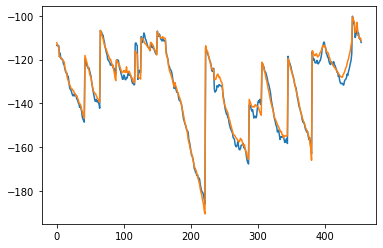

In [129]:
import matplotlib.pyplot as plt
plt.plot(a)
plt.plot(g)
plt.show()

In [60]:
ss = StandardScaler()
train_x = ss.fit_transform(X_train_total)
test_x = ss.transform(X_test_total)
tgt_train = tgt_displacement_train
    
xgb_x = Lasso(alpha = 0.0001)
xgb_x.fit(train_x, tgt_train[:, 0])
xgb_y = Lasso(alpha = 0.0001)
xgb_y.fit(train_x, tgt_train[:, 1])
DLATS_PRED = np.array(xgb_x.predict(test_x)) * std_dx + mean_dx
DLONS_PRED = np.array(xgb_y.predict(test_x)) * std_dy + mean_dy
LATS_PRED_ = X_test['LAT_7'] + DLATS_PRED
LONS_PRED_ = X_test['LON_7'] + DLONS_PRED
compare_perf_track_7cast(year = 2017, basin='AN', forecast='SHIP', forecast2 = 'HWRF', forecast3='OFCL', forecast4 = 'FSSE', forecast5='AEMN', forecast6 = 'GFSO', forecast7 = 'CLP5', LATS_PRED_= LATS_PRED_, LONS_PRED_=LONS_PRED_)
compare_perf_track_7cast(year = 2017, basin='EP', forecast='SHIP', forecast2 = 'HWRF', forecast3='OFCL', forecast4 = 'FSSE', forecast5='AEMN', forecast6 = 'GFSO', forecast7 = 'CLP5', LATS_PRED_= LATS_PRED_, LONS_PRED_=LONS_PRED_)

Number of timesteps: 578
AN Model | MAE | std | %age busts (>200km)
Hurricast 333.78 233.49 68.86
SHIP 3932.27 3783.35 99.65
HWRF 3906.48 3761.84 99.48
OFCL 3929.04 3783.23 99.48
FSSE 3928.37 3782.14 99.31
AEMN 3926.15 3781.86 99.31
GFSO 3919.81 3776.73 99.13
CLP5 3951.42 3855.61 98.44
Consensus OFCL only 3923.13 3778.43 99.13
Consensus OFCL + Hurricast 3576.86 3718.6 99.13
Number of timesteps: 455
EP Model | MAE | std | %age busts (>200km)
Hurricast 256.8 170.81 56.92
SHIP 5140.6 4653.62 99.78
HWRF 5160.57 4643.14 99.78
OFCL 5141.39 4651.16 99.78
FSSE 5174.15 4644.75 99.78
AEMN 5163.28 4651.75 100.0
GFSO 5171.37 4651.53 100.0
CLP5 5162.31 4671.95 99.34
Consensus OFCL only 5169.26 4650.76 100.0
Consensus OFCL + Hurricast 6021.61 5681.53 99.56


In [61]:
compare_perf_track_7cast(year = 2017, basin='AN', forecast='SHIP', forecast2 = 'HWRF', forecast3='OFCL', forecast4 = 'FSSE', forecast5='AEMN', forecast6 = 'GFSO', forecast7 = 'CLP5', LATS_PRED_= LATS_PRED_, LONS_PRED_=LONS_PRED_)
compare_perf_track_7cast(year = 2017, basin='EP', forecast='SHIP', forecast2 = 'HWRF', forecast3='OFCL', forecast4 = 'FSSE', forecast5='AEMN', forecast6 = 'GFSO', forecast7 = 'CLP5', LATS_PRED_= LATS_PRED_, LONS_PRED_=LONS_PRED_)

Number of timesteps: 578
AN Model | MAE | std | %age busts (>200km)
Hurricast 333.78 233.49 68.86
SHIP 3932.27 3783.35 99.65
HWRF 3906.48 3761.84 99.48
OFCL 3929.04 3783.23 99.48
FSSE 3928.37 3782.14 99.31
AEMN 3926.15 3781.86 99.31
GFSO 3919.81 3776.73 99.13
CLP5 3951.42 3855.61 98.44
Consensus OFCL only 3923.13 3778.43 99.13
Consensus OFCL + Hurricast 3576.86 3718.6 99.13
Number of timesteps: 455
EP Model | MAE | std | %age busts (>200km)
Hurricast 256.8 170.81 56.92
SHIP 5140.6 4653.62 99.78
HWRF 5160.57 4643.14 99.78
OFCL 5141.39 4651.16 99.78
FSSE 5174.15 4644.75 99.78
AEMN 5163.28 4651.75 100.0
GFSO 5171.37 4651.53 100.0
CLP5 5162.31 4671.95 99.34
Consensus OFCL only 5169.26 4650.76 100.0
Consensus OFCL + Hurricast 6021.61 5681.53 99.56


In [16]:
compare_perf_track_7cast(year = 2017, basin='AN', forecast='SHIP', forecast2 = 'HWRF', forecast3='OFCL', forecast4 = 'FSSE', forecast5='AEMN', forecast6 = 'GFSO', forecast7 = 'CLP5', LATS_PRED_=LATS_PRED_, LONS_PRED_=LONS_PRED_)
compare_perf_track_7cast(year = 2017, basin='EP', forecast='SHIP', forecast2 = 'HWRF', forecast3='OFCL', forecast4 = 'FSSE', forecast5='AEMN', forecast6 = 'GFSO', forecast7 = 'CLP5', LATS_PRED_=LATS_PRED_, LONS_PRED_=LONS_PRED_)

Number of timesteps: 578
AN Model | MAE | std | %age busts (>200km)
Hurricast 343.94 234.09 71.8
SHIP 139.04 127.53 18.86
HWRF 136.45 104.79 20.42
OFCL 125.63 112.28 15.22
FSSE 117.53 103.8 13.15
AEMN 137.81 119.96 17.99
GFSO 137.97 125.4 19.2
CLP5 486.37 334.87 82.35
Consensus OFCL only 118.04 104.31 13.49
Consensus OFCL + Hurricast 129.4 104.51 17.13
Number of timesteps: 455
EP Model | MAE | std | %age busts (>200km)
Hurricast 233.55 151.97 51.87
SHIP 101.27 59.79 7.47
HWRF 116.69 74.57 13.19
OFCL 93.28 54.12 5.49
FSSE 113.11 167.23 7.69
AEMN 103.23 64.11 8.35
GFSO 117.76 74.91 12.53
CLP5 303.59 170.98 71.21
Consensus OFCL only 120.83 530.72 5.71
Consensus OFCL + Hurricast 128.11 636.81 6.37


In [228]:
#TRAIN TABULAR ONLY
max_depth = 6
n_estimators = 150
learning_rate = 0.03
subsample = 0.7
min_child_weight=5
#col_sample_by_tree = 0.7
train_x = np.array(X_train)#[:,1:]
train_y = train_x
test_x = np.array(X_test)
test_y = test_x
tgt_train = tgt_displacement_train
    
xgb_x = XGBRegressor(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate, subsample=subsample, min_child_weight=min_child_weight)
xgb_x.fit(train_x, tgt_train[:, 0])
xgb_y = XGBRegressor(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate, subsample=subsample, min_child_weight=min_child_weight)
xgb_y.fit(train_y, tgt_train[:, 1])
DLATS_PRED = np.array(xgb_x.predict(test_x)) * std_dx + mean_dx
DLONS_PRED = np.array(xgb_y.predict(test_y)) * std_dy + mean_dy
LATS_PRED_ = X_test['LAT_7'] + DLATS_PRED
LONS_PRED_ = X_test['LON_7'] + DLONS_PRED
compare_perf_track_7cast(year = 2017, basin='AN', forecast='SHIP', forecast2 = 'HWRF', forecast3='OFCL', forecast4 = 'FSSE', forecast5='AEMN', forecast6 = 'GFSO', forecast7 = 'CLP5', LATS_PRED_= LATS_PRED_, LONS_PRED_=LONS_PRED_)
compare_perf_track_7cast(year = 2017, basin='EP', forecast='SHIP', forecast2 = 'HWRF', forecast3='OFCL', forecast4 = 'FSSE', forecast5='AEMN', forecast6 = 'GFSO', forecast7 = 'CLP5', LATS_PRED_= LATS_PRED_, LONS_PRED_=LONS_PRED_)

Number of timesteps: 578
AN Model | MAE | std | %age busts (>200km)
Hurricast 424.02 284.84 76.12
SHIP 139.04 127.53 18.86
HWRF 136.45 104.79 20.42
OFCL 125.63 112.28 15.22
FSSE 117.53 103.8 13.15
AEMN 137.81 119.96 17.99
GFSO 137.97 125.4 19.2
CLP5 486.37 334.87 82.35
Consensus OFCL only 118.04 104.31 13.49
Consensus OFCL + Hurricast 138.2 101.69 19.38
Number of timesteps: 455
EP Model | MAE | std | %age busts (>200km)
Hurricast 260.71 148.92 61.98
SHIP 101.27 59.79 7.47
HWRF 116.69 74.57 13.19
OFCL 93.28 54.12 5.49
FSSE 113.11 167.23 7.69
AEMN 103.23 64.11 8.35
GFSO 117.76 74.91 12.53
CLP5 303.59 170.98 71.21
Consensus OFCL only 96.07 62.17 5.49
Consensus OFCL + Hurricast 99.08 61.01 6.37


In [229]:
#TRAIN EMBED ONLY
max_depth = 7
n_estimators = 150
learning_rate = 0.05
subsample = 0.7
min_child_weight=5
#col_sample_by_tree = 0.7
train_x = X_train_embed
train_y = train_x
test_x = X_test_embed
test_y = test_x
tgt_train = tgt_displacement_train
    
xgb_x = XGBRegressor(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate, subsample=subsample, min_child_weight=min_child_weight)
xgb_x.fit(train_x, tgt_train[:, 0])
xgb_y = XGBRegressor(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate, subsample=subsample, min_child_weight=min_child_weight)
xgb_y.fit(train_y, tgt_train[:, 1])
DLATS_PRED = np.array(xgb_x.predict(test_x)) * std_dx + mean_dx
DLONS_PRED = np.array(xgb_y.predict(test_y)) * std_dy + mean_dy
LATS_PRED_ = X_test['LAT_7'] + DLATS_PRED
LONS_PRED_ = X_test['LON_7'] + DLONS_PRED
compare_perf_track_7cast(year = 2017, basin='AN', forecast='SHIP', forecast2 = 'HWRF', forecast3='OFCL', forecast4 = 'FSSE', forecast5='AEMN', forecast6 = 'GFSO', forecast7 = 'CLP5', LATS_PRED_= LATS_PRED_, LONS_PRED_=LONS_PRED_)
compare_perf_track_7cast(year = 2017, basin='EP', forecast='SHIP', forecast2 = 'HWRF', forecast3='OFCL', forecast4 = 'FSSE', forecast5='AEMN', forecast6 = 'GFSO', forecast7 = 'CLP5', LATS_PRED_= LATS_PRED_, LONS_PRED_=LONS_PRED_)

Number of timesteps: 578
AN Model | MAE | std | %age busts (>200km)
Hurricast 351.33 238.42 73.01
SHIP 139.04 127.53 18.86
HWRF 136.45 104.79 20.42
OFCL 125.63 112.28 15.22
FSSE 117.53 103.8 13.15
AEMN 137.81 119.96 17.99
GFSO 137.97 125.4 19.2
CLP5 486.37 334.87 82.35
Consensus OFCL only 118.04 104.31 13.49
Consensus OFCL + Hurricast 130.02 105.08 17.82
Number of timesteps: 455
EP Model | MAE | std | %age busts (>200km)
Hurricast 238.62 154.8 50.11
SHIP 101.27 59.79 7.47
HWRF 116.69 74.57 13.19
OFCL 93.28 54.12 5.49
FSSE 113.11 167.23 7.69
AEMN 103.23 64.11 8.35
GFSO 117.76 74.91 12.53
CLP5 303.59 170.98 71.21
Consensus OFCL only 96.07 62.17 5.49
Consensus OFCL + Hurricast 98.39 62.63 6.15


In [204]:
#OFCL + TABULAR ONLY
max_depth = 6
n_estimators = 150
learning_rate = 0.05
subsample = 0.7
min_child_weight=5
#col_sample_by_tree = 0.7
train_x = X_test_baseline[:m]
train_y = train_x
test_x = X_test_baseline
test_y = test_x
tgt_train = tgt_displacement_test[:m]
    
xgb_x = XGBRegressor(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate, subsample=subsample, min_child_weight=min_child_weight)
xgb_x.fit(train_x, tgt_train[:, 0])
xgb_y = XGBRegressor(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate, subsample=subsample, min_child_weight=min_child_weight)
xgb_y.fit(train_y, tgt_train[:, 1])
DLATS_PRED = np.array(xgb_x.predict(test_x)) * std_dx + mean_dx
DLONS_PRED = np.array(xgb_y.predict(test_y)) * std_dy + mean_dy
LATS_PRED_ = X_test['LAT_7'] + DLATS_PRED
LONS_PRED_ = X_test['LON_7'] + DLONS_PRED
compare_perf_track_7cast(year = 2017, basin='AN', forecast='SHIP', forecast2 = 'HWRF', forecast3='OFCL', forecast4 = 'FSSE', forecast5='AEMN', forecast6 = 'GFSO', forecast7 = 'CLP5', LATS_PRED_= LATS_PRED_, LONS_PRED_=LONS_PRED_)
compare_perf_track_7cast(year = 2017, basin='EP', forecast='SHIP', forecast2 = 'HWRF', forecast3='OFCL', forecast4 = 'FSSE', forecast5='AEMN', forecast6 = 'GFSO', forecast7 = 'CLP5', LATS_PRED_= LATS_PRED_, LONS_PRED_=LONS_PRED_)

Number of timesteps: 578
AN Model | MAE | std | %age busts (>200km)
Hurricast 307.21 206.32 65.57
SHIP 139.04 127.53 18.86
HWRF 136.45 104.79 20.42
OFCL 125.63 112.28 15.22
FSSE 117.53 103.8 13.15
AEMN 137.81 119.96 17.99
GFSO 137.97 125.4 19.2
CLP5 486.37 334.87 82.35
Consensus OFCL only 118.04 104.31 13.49
Consensus OFCL + Hurricast 129.09 101.07 16.26
Number of timesteps: 455
EP Model | MAE | std | %age busts (>200km)
Hurricast 177.28 108.44 33.19
SHIP 101.27 59.79 7.47
HWRF 116.69 74.57 13.19
OFCL 93.28 54.12 5.49
FSSE 113.11 167.23 7.69
AEMN 103.23 64.11 8.35
GFSO 117.76 74.91 12.53
CLP5 303.59 170.98 71.21
Consensus OFCL only 96.07 62.17 5.49
Consensus OFCL + Hurricast 96.27 60.84 5.93


In [203]:
#OFCL + EMBED
max_depth = 7
n_estimators = 200
learning_rate = 0.05
subsample = 0.8
min_child_weight=5
#col_sample_by_tree = 0.7
train_x = np.concatenate((X_test_baseline[:m], X_test_embed[:m]), axis = 1)
train_y = train_x
test_x = np.concatenate((X_test_baseline, X_test_embed), axis = 1)
test_y = test_x
tgt_train = tgt_displacement_test[:m]
    
xgb_x = XGBRegressor(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate, subsample=subsample, min_child_weight=min_child_weight)
xgb_x.fit(train_x, tgt_train[:, 0])
xgb_y = XGBRegressor(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate, subsample=subsample, min_child_weight=min_child_weight)
xgb_y.fit(train_y, tgt_train[:, 1])
DLATS_PRED = np.array(xgb_x.predict(test_x)) * std_dx + mean_dx
DLONS_PRED = np.array(xgb_y.predict(test_y)) * std_dy + mean_dy
LATS_PRED_ = X_test['LAT_7'] + DLATS_PRED
LONS_PRED_ = X_test['LON_7'] + DLONS_PRED
compare_perf_track_7cast(year = 2017, basin='AN', forecast='SHIP', forecast2 = 'HWRF', forecast3='OFCL', forecast4 = 'FSSE', forecast5='AEMN', forecast6 = 'GFSO', forecast7 = 'CLP5', LATS_PRED_= LATS_PRED_, LONS_PRED_=LONS_PRED_)
compare_perf_track_7cast(year = 2017, basin='EP', forecast='SHIP', forecast2 = 'HWRF', forecast3='OFCL', forecast4 = 'FSSE', forecast5='AEMN', forecast6 = 'GFSO', forecast7 = 'CLP5', LATS_PRED_= LATS_PRED_, LONS_PRED_=LONS_PRED_)

Number of timesteps: 578
AN Model | MAE | std | %age busts (>200km)
Hurricast 279.76 203.14 58.3
SHIP 139.04 127.53 18.86
HWRF 136.45 104.79 20.42
OFCL 125.63 112.28 15.22
FSSE 117.53 103.8 13.15
AEMN 137.81 119.96 17.99
GFSO 137.97 125.4 19.2
CLP5 486.37 334.87 82.35
Consensus OFCL only 118.04 104.31 13.49
Consensus OFCL + Hurricast 124.14 102.44 14.88
Number of timesteps: 455
EP Model | MAE | std | %age busts (>200km)
Hurricast 175.9 119.1 34.73
SHIP 101.27 59.79 7.47
HWRF 116.69 74.57 13.19
OFCL 93.28 54.12 5.49
FSSE 113.11 167.23 7.69
AEMN 103.23 64.11 8.35
GFSO 117.76 74.91 12.53
CLP5 303.59 170.98 71.21
Consensus OFCL only 96.07 62.17 5.49
Consensus OFCL + Hurricast 96.75 61.87 5.71


In [23]:
x_viz_train = np.load('../data/X_train_vision_comp_1980_34_20_120.npy', allow_pickle=True).reshape(-1, 3*5*3*3)
x_viz_test = np.load('../data/X_test_vision_comp_1980_34_20_120.npy', allow_pickle=True).reshape(-1, 3*5*3*3)[-n:]
x_viz_train = np.concatenate((x_viz_train, x_viz_test[:m]), axis = 0)
X_train_total_comp = np.concatenate((X_train, x_viz_train), axis = 1)
X_test_total_comp = np.concatenate((X_test, x_viz_test), axis = 1)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [498]:
#TRAIN TOTAL COMP
max_depth = 9
n_estimators = 150
learning_rate = 0.05
subsample = 0.8
min_child_weight=5
#col_sample_by_tree = 0.7
train_x = X_train_total_comp
train_y = train_x
test_x = X_test_total_comp
test_y = test_x
tgt_train = tgt_displacement_train
    
xgb_x = XGBRegressor(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate, subsample=subsample, min_child_weight=min_child_weight)
xgb_x.fit(train_x, tgt_train[:, 0])
xgb_y = XGBRegressor(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate, subsample=subsample, min_child_weight=min_child_weight)
xgb_y.fit(train_y, tgt_train[:, 1])
DLATS_PRED = np.array(xgb_x.predict(test_x)) * std_dx + mean_dx
DLONS_PRED = np.array(xgb_y.predict(test_y)) * std_dy + mean_dy
LATS_PRED_ = X_test['LAT_7'] + DLATS_PRED
LONS_PRED_ = X_test['LON_7'] + DLONS_PRED
compare_perf_track_7cast(year = 2017, basin='AN', forecast='SHIP', forecast2 = 'HWRF', forecast3='OFCL', forecast4 = 'FSSE', forecast5='AEMN', forecast6 = 'GFSO', forecast7 = 'CLP5', LATS_PRED_= LATS_PRED_, LONS_PRED_=LONS_PRED_)
compare_perf_track_7cast(year = 2017, basin='EP', forecast='SHIP', forecast2 = 'HWRF', forecast3='OFCL', forecast4 = 'FSSE', forecast5='AEMN', forecast6 = 'GFSO', forecast7 = 'CLP5', LATS_PRED_= LATS_PRED_, LONS_PRED_=LONS_PRED_)

Number of timesteps: 669
AN Model | MAE | std | %age busts (>200km)
Hurricast 134.37 96.2 17.64
SHIP 77.06 64.11 4.04
HWRF 72.01 47.85 2.39
OFCL 70.36 57.78 2.84
FSSE 67.53 53.48 3.44
AEMN 72.81 57.98 2.54
GFSO 70.47 56.01 3.74
CLP5 197.76 142.19 36.17
Consensus OFCL only 62.67 50.49 2.09
Consensus OFCL + Hurricast 63.73 47.34 2.24
Number of timesteps: 522
EP Model | MAE | std | %age busts (>200km)
Hurricast 83.35 47.74 1.53
SHIP 57.78 33.53 0.38
HWRF 70.1 43.23 2.11
OFCL 54.11 31.63 0.19
FSSE 55.85 53.93 0.96
AEMN 62.05 36.83 0.57
GFSO 67.11 45.03 1.34
CLP5 125.37 70.95 15.13
Consensus OFCL only 53.04 33.46 0.38
Consensus OFCL + Hurricast 49.45 30.4 0.19


In [175]:
year = 2017
forecast='SHIP'
forecast2 = 'HWRF'
forecast3 = 'OFCL'
forecast4 = 'FSSE'
forecast5 = 'GFSO'
forecast6 = 'AEMN'
forecast7 = 'CLP5'
mode = 'lat'
basin = 'AN'
test = X_test_total
DLATS_PRED = np.array(xgb_x.predict(test_x)) * std_dx + mean_dx
DLONS_PRED = np.array(xgb_y.predict(test_y)) * std_dy + mean_dy
LATS_PRED_ = X_test['LAT_7'] + DLATS_PRED
LONS_PRED_ = X_test['LON_7'] + DLONS_PRED

if forecast2 != None:
    if True: 
        baseline_ = X_test_baseline.loc[X_test_baseline['YEAR_0'] <= 2017].loc[
            X_test_baseline[forecast7 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast6 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast5 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast4 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast3 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast2 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast + '_24_' + mode + '_7'] > -320].loc[X_test_baseline['cat_basin_' + basin + '_0'] == 1]  # .loc[#X_test_baseline['SHIP_24_'+mode+'_7'] > 0].index
        if basin == 'EP':
            baseline_ = baseline_.loc[X_test_baseline['YEAR_0'] < 2019]
        index = baseline_.index
        LATS_BASE_2 = np.array(baseline_[forecast2 + '_24_lat_7'])
        LONS_BASE_2 = np.array(baseline_[forecast2 + '_24_lon_7'])
        LATS_BASE_3 = np.array(baseline_[forecast3 + '_24_lat_7'])
        LONS_BASE_3 = np.array(baseline_[forecast3 + '_24_lon_7'])
        LATS_BASE_4 = np.array(baseline_[forecast4 + '_24_lat_7'])
        LONS_BASE_4 = np.array(baseline_[forecast4 + '_24_lon_7'])
        LATS_BASE_5 = np.array(baseline_[forecast5 + '_24_lat_7'])
        LONS_BASE_5 = np.array(baseline_[forecast5 + '_24_lon_7'])
        LATS_BASE_6 = np.array(baseline_[forecast6 + '_24_lat_7'])
        LONS_BASE_6 = np.array(baseline_[forecast6 + '_24_lon_7'])
        LATS_BASE_7 = np.array(baseline_[forecast7 + '_24_lat_7'])
        LONS_BASE_7 = np.array(baseline_[forecast7 + '_24_lon_7'])
        
    LATS_TEST_t = np.array(X_test['LAT_7'] + np.array(tgt_displacement_test[:, 0])*std_dx+mean_dx)[index]
    LONS_TEST_t = np.array(X_test['LON_7'] + np.array(tgt_displacement_test[:, 1])*std_dy+mean_dy)[index]
    tgt_x = (np.array(tgt_displacement_test[:, 0])*std_dx+mean_dx)[index]
    tgt_y = (np.array(tgt_displacement_test[:, 1])*std_dy+mean_dy)[index]
    baseline_1_x = np.array(baseline_[forecast + '_24_'+mode+'_7'])
    baseline_1_y = np.array(baseline_[forecast + '_24_lon_7'])
    baseline_2_x = np.array(baseline_[forecast2 + '_24_'+mode+'_7'])
    baseline_2_y = np.array(baseline_[forecast2 + '_24_lon_7'])
    baseline_3_x = np.array(baseline_[forecast3 + '_24_'+mode+'_7'])
    baseline_3_y = np.array(baseline_[forecast3 + '_24_lon_7'])
    baseline_4_x = np.array(baseline_[forecast4 + '_24_'+mode+'_7'])
    baseline_4_y = np.array(baseline_[forecast4 + '_24_lon_7'])
    baseline_5_x = np.array(baseline_[forecast5 + '_24_'+mode+'_7'])
    baseline_5_y = np.array(baseline_[forecast5 + '_24_lon_7'])
    baseline_6_x = np.array(baseline_[forecast6 + '_24_'+mode+'_7'])
    baseline_6_y = np.array(baseline_[forecast6 + '_24_lon_7'])
    baseline_7_x = np.array(baseline_[forecast7 + '_24_'+mode+'_7'])
    baseline_7_y = np.array(baseline_[forecast7 + '_24_lon_7'])
    LATS_PRED_t = np.array(LATS_PRED_)[index]
    LONS_PRED_t = np.array(LONS_PRED_)[index]
    
    for i in range(len(LATS_PRED_t)):
        if baseline_1_y[i] > 150:
            baseline_1_y[i] -= 360
            baseline_6_y[i] -= 360
            baseline_5_y[i] -= 360
            baseline_3_y[i] -= 360
        if baseline_2_y[i] > 150:
            baseline_2_y[i] -= 360
            
        if LONS_TEST_t[i] > 150:
            LONS_PRED_t[i] -= 360
            
            
    train_consensus_x = np.stack((baseline_1_x, baseline_2_x, baseline_3_x, baseline_4_x, baseline_5_x, baseline_6_x), axis = 1)
    train_consensus_y = np.stack((baseline_1_y, baseline_2_y, baseline_3_y, baseline_4_y, baseline_5_y, baseline_6_y), axis = 1)
    train_consensus_hurr_x = np.stack((baseline_1_x, baseline_2_x, baseline_3_x, baseline_4_x, baseline_5_x, baseline_6_x, LATS_PRED_t), axis = 1)
    train_consensus_hurr_y = np.stack((baseline_1_y, baseline_2_y, baseline_3_y, baseline_4_y, baseline_5_y, baseline_6_y, LONS_PRED_t), axis = 1)

base = np.array(X_test['LAT_7'])[index]
for a in base:
    if a > 160:
        a-=360
base_x = np.stack((base, base, base, base, base, base), axis = 1)
train_consensus_x = train_consensus_x - base_x
base_x = np.stack((base, base, base, base, base, base, base), axis = 1)
train_consensus_hurr_x = train_consensus_hurr_x - base_x

base = np.array(X_test['LON_7'])[index]
for a in base:
    if a > 160:
        a-=360
base_y = np.stack((base, base, base, base, base, base), axis = 1)
train_consensus_y = train_consensus_y - base_y
base_y = np.stack((base, base, base, base, base, base, base), axis = 1)
train_consensus_hurr_y = train_consensus_hurr_y - base_y

if forecast2 != None:
    if True:
        baseline_ = X_test_baseline.loc[X_test_baseline['YEAR_0'] >= 2017].loc[
            X_test_baseline[forecast7 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast6 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast5 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast4 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast3 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast2 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast + '_24_' + mode + '_7'] > -320].loc[X_test_baseline['cat_basin_' + basin + '_0'] == 1]  # .loc[#X_test_baseline['SHIP_24_'+mode+'_7'] > 0].index
        if basin == 'EP':
            baseline_ = baseline_.loc[X_test_baseline['YEAR_0'] < 2019]
        index = baseline_.index
        LATS_BASE_2 = np.array(baseline_[forecast2 + '_24_lat_7'])
        LONS_BASE_2 = np.array(baseline_[forecast2 + '_24_lon_7'])
        LATS_BASE_3 = np.array(baseline_[forecast3 + '_24_lat_7'])
        LONS_BASE_3 = np.array(baseline_[forecast3 + '_24_lon_7'])
        LATS_BASE_4 = np.array(baseline_[forecast4 + '_24_lat_7'])
        LONS_BASE_4 = np.array(baseline_[forecast4 + '_24_lon_7'])
        LATS_BASE_5 = np.array(baseline_[forecast5 + '_24_lat_7'])
        LONS_BASE_5 = np.array(baseline_[forecast5 + '_24_lon_7'])
        LATS_BASE_6 = np.array(baseline_[forecast6 + '_24_lat_7'])
        LONS_BASE_6 = np.array(baseline_[forecast6 + '_24_lon_7'])
        LATS_BASE_7 = np.array(baseline_[forecast7 + '_24_lat_7'])
        LONS_BASE_7 = np.array(baseline_[forecast7 + '_24_lon_7'])
        
    LATS_TEST_te = np.array(X_test['LAT_7'] + np.array(tgt_displacement_test[:, 0])*std_dx+mean_dx)[index]
    LONS_TEST_te = np.array(X_test['LON_7'] + np.array(tgt_displacement_test[:, 1])*std_dy+mean_dy)[index]
    or_te_x = np.array(X_test['LAT_7'])[index]
    or_te_y = np.array(X_test['LON_7'])[index]
    baseline_1_x = np.array(baseline_[forecast + '_24_'+mode+'_7'])
    baseline_1_y = np.array(baseline_[forecast + '_24_lon_7'])
    baseline_2_x = np.array(baseline_[forecast2 + '_24_'+mode+'_7'])
    baseline_2_y = np.array(baseline_[forecast2 + '_24_lon_7'])
    baseline_3_x = np.array(baseline_[forecast3 + '_24_'+mode+'_7'])
    baseline_3_y = np.array(baseline_[forecast3 + '_24_lon_7'])
    baseline_4_x = np.array(baseline_[forecast4 + '_24_'+mode+'_7'])
    baseline_4_y = np.array(baseline_[forecast4 + '_24_lon_7'])
    baseline_5_x = np.array(baseline_[forecast5 + '_24_'+mode+'_7'])
    baseline_5_y = np.array(baseline_[forecast5 + '_24_lon_7'])
    baseline_6_x = np.array(baseline_[forecast6 + '_24_'+mode+'_7'])
    baseline_6_y = np.array(baseline_[forecast6 + '_24_lon_7'])
    baseline_7_x = np.array(baseline_[forecast7 + '_24_'+mode+'_7'])
    baseline_7_y = np.array(baseline_[forecast7 + '_24_lon_7'])
    LATS_PRED_te = np.array(LATS_PRED_)[index]
    LONS_PRED_te = np.array(LONS_PRED_)[index]
    
    for i in range(len(LATS_PRED_te)):
        if baseline_1_y[i] > 150:
            baseline_1_y[i] -= 360
            baseline_6_y[i] -= 360
            baseline_5_y[i] -= 360
            baseline_3_y[i] -= 360
        if baseline_2_y[i] > 150:
            baseline_2_y[i] -= 360
            
        if LONS_TEST_te[i] > 150:
            LONS_PRED_te[i] -= 360
            
    test_consensus_x = np.stack((baseline_1_x, baseline_2_x, baseline_3_x, baseline_4_x, baseline_5_x, baseline_6_x), axis = 1)
    test_consensus_y = np.stack((baseline_1_y, baseline_2_y, baseline_3_y, baseline_4_y, baseline_5_y, baseline_6_y), axis = 1)
    test_consensus_hurr_x = np.stack((baseline_1_x, baseline_2_x, baseline_3_x, baseline_4_x, baseline_5_x, baseline_6_x, LATS_PRED_te), axis = 1)
    test_consensus_hurr_y = np.stack((baseline_1_y, baseline_2_y, baseline_3_y, baseline_4_y, baseline_5_y, baseline_6_y, LONS_PRED_te), axis = 1)

In [176]:
base = np.array(X_test['LAT_7'])[index]
for a in base:
    if a > 160:
        a-=360
base_x = np.stack((base, base, base, base, base, base), axis = 1)
test_consensus_x = test_consensus_x - base_x
base_x = np.stack((base, base, base, base, base, base, base), axis = 1)
test_consensus_hurr_x = test_consensus_hurr_x - base_x

base = np.array(X_test['LON_7'])[index]
for i in range(len(base)):
    if base[i] > 160:
        base[i]-=360
base_y = np.stack((base, base, base, base, base, base), axis = 1)
test_consensus_y = test_consensus_y - base_y
base_y = np.stack((base, base, base, base, base, base, base), axis = 1)
test_consensus_hurr_y = test_consensus_hurr_y - base_y

In [177]:
ss = StandardScaler()
train_consensus_x = ss.fit_transform(train_consensus_x)
test_consensus_x = ss.transform(test_consensus_x)
ss2 = StandardScaler()
train_consensus_y = ss.fit_transform(train_consensus_y)
test_consensus_y = ss.transform(test_consensus_y)

ss3 = StandardScaler()
train_consensus_hurr_x = ss3.fit_transform(train_consensus_hurr_x)
test_consensus_hurr_x = ss3.transform(test_consensus_hurr_x)

ss4 = StandardScaler()
train_consensus_hurr_y = ss4.fit_transform(train_consensus_hurr_y)
test_consensus_hurr_y = ss4.transform(test_consensus_hurr_y)

In [190]:
#AN
m_x = Lasso(alpha = 0.001)
m_x.fit(train_consensus_x, tgt_x)
preds_x = np.array(m_x.predict(test_consensus_x))+np.array(X_test['LAT_7'])[index]

m_y = Lasso(alpha = 0.01)
m_y.fit(train_consensus_y, tgt_y)
preds_y = np.array(m_y.predict(test_consensus_y)) + base
d_km_pred = np.zeros(len(preds_y))
for i in range(len(LATS_PRED_te)):
    d_km_pred[i] = get_distance_km(preds_y[i], preds_x[i], LONS_TEST_te[i], LATS_TEST_te[i])
    
print("Number of timesteps:", len(LATS_PRED_te))
print(basin, 'Model | MAE | std | %age busts (>200km)')
print("Lasso consensus w/o hurricast", np.around(d_km_pred.mean(), decimals = 2), np.around(d_km_pred.std(), decimals = 2), np.around(sum(d_km_pred > 200)*100/len(LATS_PRED_te), decimals = 2))

Number of timesteps: 578
AN Model | MAE | std | %age busts (>200km)
Lasso consensus w/o hurricast 116.73 104.54 12.11


In [165]:
m_x.coef_

array([-0.21300206,  0.76481366,  1.147674  ,  0.3719764 , -0.5293032 ,
        0.6864948 ], dtype=float32)

In [201]:
#AN
m_x = Lasso(alpha = 0.001)
m_x.fit(train_consensus_hurr_x, tgt_x)
preds_x = np.array(m_x.predict(test_consensus_hurr_x))+np.array(X_test['LAT_7'])[index]

m_y = Lasso(alpha = 0.001)
m_y.fit(train_consensus_hurr_y, tgt_y)
preds_y = np.array(m_y.predict(test_consensus_hurr_y)) + base
d_km_pred = np.zeros(len(preds_y))
for i in range(len(LATS_PRED_te)):
    d_km_pred[i] = get_distance_km(preds_y[i], preds_x[i], LONS_TEST_te[i], LATS_TEST_te[i])
    
print("Number of timesteps:", len(LATS_PRED_te))
print(basin, 'Model | MAE | std | %age busts (>200km)')
print("Lasso consensus w/ hurricast", np.around(d_km_pred.mean(), decimals = 2), np.around(d_km_pred.std(), decimals = 2), np.around(sum(d_km_pred > 200)*100/len(LATS_PRED_te), decimals = 2))

Number of timesteps: 578
AN Model | MAE | std | %age busts (>200km)
Lasso consensus w/ hurricast 117.16 102.77 11.59


In [167]:
m_y.coef_

array([ 0.31968802,  1.0979068 ,  1.4015273 , -0.08218948, -0.43961585,
        0.88553125,  0.10718425], dtype=float32)

In [216]:
index_t = X_train.loc[X_train['cat_basin_AN_0'] + X_train['cat_basin_EP_0'] == 1].index
index_te = X_test[:m].loc[X_test['cat_basin_AN_0'] + X_test['cat_basin_EP_0'] == 1].index
train = np.concatenate((X_train_total[index_t], X_test_total[index_te-765]), axis = 0)
tgt_train_ = np.concatenate((tgt_displacement_train[index_t], tgt_displacement_test[index_te]), axis = 0)

In [219]:
index_te

Int64Index([  768,   769,   770,   771,   772,   773,   774,   775,   776,
              777,
            ...
            15138, 15139, 15140, 15141, 15142, 15143, 15144, 15145, 15146,
            15147],
           dtype='int64', length=5591)

In [217]:
#TRAIN TOTAL
max_depth = 7
n_estimators = 150
learning_rate = 0.05
subsample = 0.8
min_child_weight=5
#col_sample_by_tree = 0.7
train_x = train
train_y = train_x
test_x = X_test_total
test_y = X_test_total
tgt_train = tgt_train_
    
xgb_x = XGBRegressor(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate, subsample=subsample, min_child_weight=min_child_weight)
xgb_x.fit(train_x, tgt_train[:, 0])
xgb_y = XGBRegressor(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate, subsample=subsample, min_child_weight=min_child_weight)
xgb_y.fit(train_y, tgt_train[:, 1])
DLATS_PRED = np.array(xgb_x.predict(test_x)) * std_dx + mean_dx
DLONS_PRED = np.array(xgb_y.predict(test_y)) * std_dy + mean_dy
LATS_PRED_ = X_test['LAT_7'] + DLATS_PRED
LONS_PRED_ = X_test['LON_7'] + DLONS_PRED
compare_perf_track_7cast(year = 2017, basin='AN', forecast='SHIP', forecast2 = 'HWRF', forecast3='OFCL', forecast4 = 'FSSE', forecast5='AEMN', forecast6 = 'GFSO', forecast7 = 'CLP5', LATS_PRED_= LATS_PRED_, LONS_PRED_=LONS_PRED_)
compare_perf_track_7cast(year = 2017, basin='EP', forecast='SHIP', forecast2 = 'HWRF', forecast3='OFCL', forecast4 = 'FSSE', forecast5='AEMN', forecast6 = 'GFSO', forecast7 = 'CLP5', LATS_PRED_= LATS_PRED_, LONS_PRED_=LONS_PRED_)

Number of timesteps: 578
AN Model | MAE | std | %age busts (>200km)
Hurricast 412.85 294.16 78.55
SHIP 139.04 127.53 18.86
HWRF 136.45 104.79 20.42
OFCL 125.63 112.28 15.22
FSSE 117.53 103.8 13.15
AEMN 137.81 119.96 17.99
GFSO 137.97 125.4 19.2
CLP5 486.37 334.87 82.35
Consensus OFCL only 118.04 104.31 13.49
Consensus OFCL + Hurricast 136.71 109.01 18.86
Number of timesteps: 455
EP Model | MAE | std | %age busts (>200km)
Hurricast 278.66 192.35 61.54
SHIP 101.27 59.79 7.47
HWRF 116.69 74.57 13.19
OFCL 93.28 54.12 5.49
FSSE 113.11 167.23 7.69
AEMN 103.23 64.11 8.35
GFSO 117.76 74.91 12.53
CLP5 303.59 170.98 71.21
Consensus OFCL only 96.07 62.17 5.49
Consensus OFCL + Hurricast 104.36 65.04 7.47


In [518]:
index_t = X_test_baseline[:m].loc[X_test_baseline['cat_basin_AN_0'] + X_test_baseline['cat_basin_EP_0'] == 1].index
train = np.concatenate((np.array(X_test_baseline[:m])[index_t], X_test_embed[index_t]), axis = 1)
tgt_train_ = tgt_displacement_test[index_t]

In [555]:
#TRAIN TOTAL
max_depth = 8
n_estimators = 150
learning_rate = 0.07
subsample = 0.7
min_child_weight=1
#col_sample_by_tree = 0.7
train_x = train
train_y = train_x
test_x = np.concatenate((X_test_baseline, X_test_embed), axis = 1)
test_y = test_x
tgt_train = tgt_train_
    
xgb_x = XGBRegressor(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate, subsample=subsample, min_child_weight=min_child_weight)
xgb_x.fit(train_x, tgt_train[:, 0])
xgb_y = XGBRegressor(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate, subsample=subsample, min_child_weight=min_child_weight)
xgb_y.fit(train_y, tgt_train[:, 1])
DLATS_PRED = np.array(xgb_x.predict(test_x)) * std_dx + mean_dx
DLONS_PRED = np.array(xgb_y.predict(test_y)) * std_dy + mean_dy
LATS_PRED_ = X_test['LAT_7'] + DLATS_PRED
LONS_PRED_ = X_test['LON_7'] + DLONS_PRED
a, b = compare_perf_track_7cast(year = 2017, basin='AN', forecast='SHIP', forecast2 = 'HWRF', forecast3='OFCL', forecast4 = 'FSSE', forecast5='AEMN', forecast6 = 'GFSO', forecast7 = 'CLP5', LATS_PRED_= LATS_PRED_, LONS_PRED_=LONS_PRED_)
c, d = compare_perf_track_7cast(year = 2017, basin='EP', forecast='SHIP', forecast2 = 'HWRF', forecast3='OFCL', forecast4 = 'FSSE', forecast5='AEMN', forecast6 = 'GFSO', forecast7 = 'CLP5', LATS_PRED_= LATS_PRED_, LONS_PRED_=LONS_PRED_)

Number of timesteps: 669
AN Model | MAE | std | %age busts (>200km)
Hurricast 100.64 82.46 8.52
SHIP 77.06 64.11 4.04
HWRF 72.01 47.85 2.39
OFCL 70.36 57.78 2.84
FSSE 67.53 53.48 3.44
AEMN 72.81 57.98 2.54
GFSO 70.47 56.01 3.74
CLP5 197.76 142.19 36.17
Consensus OFCL only 62.67 50.49 2.09
Consensus OFCL + Hurricast 61.57 48.15 1.49
Number of timesteps: 522
EP Model | MAE | std | %age busts (>200km)
Hurricast 58.91 32.78 0.38
SHIP 57.78 33.53 0.38
HWRF 70.1 43.23 2.11
OFCL 54.11 31.63 0.19
FSSE 55.85 53.93 0.96
AEMN 62.05 36.83 0.57
GFSO 67.11 45.03 1.34
CLP5 125.37 70.95 15.13
Consensus OFCL only 53.04 33.46 0.38
Consensus OFCL + Hurricast 50.4 31.16 0.38


In [610]:
a[217:220] > 400

array([ True,  True,  True])

In [556]:
b = pd.DataFrame(b)
b.columns = cols

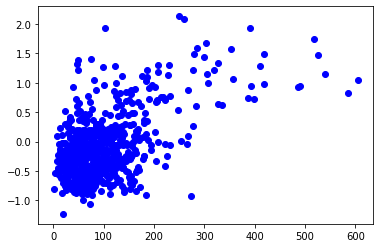

In [599]:
plt.plot(a, b['STORM_DISPLACEMENT_Y_7'], 'bo')

In [587]:
e = pd.DataFrame(a)
e.columns = ['Target']

,Target
0,29.570558
1,94.404688
2,144.106247
3,110.543451
4,30.600302
...,...
664,356.724132
665,81.134094
666,306.872005
667,303.261238


In [593]:
df = pd.concat((b, e), axis = 1)

In [616]:
df.iloc[217][-30:]

STORM_DISPLACEMENT_Y_5       0.566200
LAT_6                       32.985100
LON_6                      -30.674999
WMO_WIND_6                  90.000000
WMO_PRES_6                 966.500000
DIST2LAND_6               1425.000000
STORM_SPEED_6               17.000000
COS_STORM_DIR_6              0.469472
SIN_STORM_DIR_6              0.882948
COS_LAT_6                    0.838812
SIN_LAT_6                    0.544421
COS_LON_6                    0.860075
SIN_LON_6                   -0.510168
STORM_DISPLACEMENT_X_6       0.385100
STORM_DISPLACEMENT_Y_6       0.825000
LAT_7                       33.400002
LON_7                      -29.700001
WMO_WIND_7                  95.000000
WMO_PRES_7                 963.000000
DIST2LAND_7               1353.000000
STORM_SPEED_7               18.000000
COS_STORM_DIR_7              0.438371
SIN_STORM_DIR_7              0.898794
COS_LAT_7                    0.834848
SIN_LAT_7                    0.550481
COS_LON_7                    0.868632
SIN_LON_7   

In [598]:
df.corrwith(df['Target'])[-30:]

STORM_DISPLACEMENT_Y_5    0.528886
LAT_6                     0.361303
LON_6                     0.257946
WMO_WIND_6               -0.213017
WMO_PRES_6                0.156788
DIST2LAND_6               0.181879
STORM_SPEED_6             0.430201
COS_STORM_DIR_6           0.030040
SIN_STORM_DIR_6           0.443096
COS_LAT_6                -0.404716
SIN_LAT_6                 0.349151
COS_LON_6                 0.249357
SIN_LON_6                 0.263808
STORM_DISPLACEMENT_X_6    0.304211
STORM_DISPLACEMENT_Y_6    0.543905
LAT_7                     0.369798
LON_7                     0.274303
WMO_WIND_7               -0.215459
WMO_PRES_7                0.160926
DIST2LAND_7               0.183372
STORM_SPEED_7             0.450341
COS_STORM_DIR_7           0.029825
SIN_STORM_DIR_7           0.435316
COS_LAT_7                -0.414633
SIN_LAT_7                 0.356799
COS_LON_7                 0.263034
SIN_LON_7                 0.285186
STORM_DISPLACEMENT_X_7    0.318487
STORM_DISPLACEMENT_Y

In [575]:
b.apply(lambda x: x.corr(pd.DataFrame(a)))

ValueError: ('all the input array dimensions except for the concatenation axis must match exactly', 'occurred at index LAT_0')

# Table intensity AN

In [10]:
from sklearn.feature_selection import SelectFromModel

n = X_test_baseline.shape[0]
X_test_total = X_test_total[-n:]
tgt_intensity_test = tgt_intensity_test[-n:]
X_test = X_test[-n:]
X_test_embed = X_test_embed[-n:]
tgt_displacement_test = tgt_displacement_test[-n:]

In [78]:
dict6 = {'year':[], 'num_samples':[], 'MAEs_full':[], 'std_full':[], 'MAES_2012':[], 'std_2012':[], 'MAES_SHIP':[], 'std_SHIP':[], 'MAES_HWRF':[], 'std_HWRF':[], 'MAES_OFCL':[], 'std_OFCL':[], 'MAES_FSSE':[], 'std_FSSE':[], 'MAES_GFSO':[], 'std_GFSO':[], 'MAES_DSHP':[], 'std_DSHP':[]}

In [79]:
tgt_train = np.concatenate((tgt_intensity_train, tgt_intensity_test[:17094]), axis = 0)
tgt_train5 = tgt_train*std_+mean_
mean_intensity2 = tgt_train5.mean()
std_intensity2 = tgt_train5.std()
tgt_train5 = (tgt_train5 - mean_intensity2)/std_intensity2
tgt_intensity_test = (tgt_intensity_test*std_+mean_ - mean_intensity2)/std_intensity2
std_ = float(std_intensity2)
mean_ = float(mean_intensity2)

In [62]:
#FULL TRAIN WITH CNN/GRU EMBEDS + ONLY AN EP in training + only more than. 40kn winds
index_t = X_train.loc[X_train['cat_basin_AN_0'] + X_train['cat_basin_EP_0'] == 1].loc[X_train['WMO_WIND_7'] > 34].index
index_te = X_test[:17094].loc[X_test['cat_basin_AN_0'] + X_test['cat_basin_EP_0'] == 1].loc[X_test['WMO_WIND_7'] > 34].index
train = np.concatenate((X_train_total[index_t], X_test_total[index_te]), axis = 0)
#tgt_train = np.concatenate((tgt_intensity_train[index_t], tgt_intensity_test[index_te]), axis = 0)

xgb_total = XGBRegressor(max_depth=6, n_estimators=150, learning_rate=0.03, subsample=0.8, min_child_weight=1)
xgb_total.fit(train, tgt_train)
compare_perf_intensity_per_year_6cast(X_test_total, dict6, xgb_total = xgb_total, xgb_tot = xgb_total, basin='AN', forecast='SHIP', forecast2 = 'HWRF', forecast3 = 'OFCL', forecast4 = 'FSSE', forecast5 = 'GFSO', forecast6 = 'DSHP', year = 2017)
compare_perf_intensity_per_year_6cast(X_test_total, dict6, xgb_total = xgb_total, xgb_tot = xgb_total, basin='EP', forecast='SHIP', forecast2 = 'HWRF', forecast3 = 'OFCL', forecast4 = 'FSSE', forecast5 = 'GFSO', forecast6 = 'DSHP', year = 2017)

Total number of steps for comparison:  669
Year 2017 Basin AN MAE intensity | std | busts > 20kn %
Hurr full:  10.93 14.14 14.65
Hurr until 2012:  10.93 14.14 14.65
SHIP 11.29 15.51 17.34
HWRF 9.59 12.59 11.21
OFCL 8.55 11.85 7.32
FSSE 8.44 11.29 7.32
GFSO 14.0 15.64 22.42
DSHP 10.28 13.59 14.8
Consensus ofcl 8.27
Consensus Hurr 10.09
Total number of steps for comparison:  522
Year 2017 Basin EP MAE intensity | std | busts > 20kn %
Hurr full:  11.36 15.31 18.01
Hurr until 2012:  11.36 15.31 18.01
SHIP 11.97 15.22 16.86
HWRF 9.95 14.02 14.18
OFCL 9.55 12.99 7.85
FSSE 9.22 12.38 9.96
GFSO 16.95 19.67 31.99
DSHP 11.85 15.13 16.86
Consensus ofcl 9.24
Consensus Hurr 10.98


In [63]:
index_t = X_train.loc[X_train['cat_basin_AN_0'] + X_train['cat_basin_EP_0'] == 1].loc[X_train['WMO_WIND_7'] > 34].index
index_te = X_test[:17094].loc[X_test['cat_basin_AN_0'] + X_test['cat_basin_EP_0'] == 1].loc[X_test['WMO_WIND_7'] > 34].index
train = np.concatenate((X_train_total[index_t], X_test_total[index_te]), axis = 0)
tgt_train = np.array(((np.concatenate((tgt_intensity_train[index_t], tgt_intensity_test[index_te]), axis = 0))*float(std_intensity)+float(mean_intensity)-mean_)/std_)
xgb_total = XGBRegressor(max_depth=8, n_estimators=150, learning_rate=0.03, subsample=0.8, min_child_weight=1)
xgb_total.fit(train, tgt_train)
compare_perf_intensity_per_year_6cast(X_test_total, dict6, xgb_total = xgb_total, xgb_tot = xgb_total, basin='AN', forecast='SHIP', forecast2 = 'HWRF', forecast3 = 'OFCL', forecast4 = 'FSSE', forecast5 = 'GFSO', forecast6 = 'DSHP', year = 2017)
compare_perf_intensity_per_year_6cast(X_test_total, dict6, xgb_total = xgb_total, xgb_tot = xgb_total, basin='EP', forecast='SHIP', forecast2 = 'HWRF', forecast3 = 'OFCL', forecast4 = 'FSSE', forecast5 = 'GFSO', forecast6 = 'DSHP', year = 2017)

Total number of steps for comparison:  669
Year 2017 Basin AN MAE intensity | std | busts > 20kn %
Hurr full:  10.8 13.98 14.5
Hurr until 2012:  10.8 13.98 14.5
SHIP 11.29 15.51 17.34
HWRF 9.59 12.59 11.21
OFCL 8.55 11.85 7.32
FSSE 8.44 11.29 7.32
GFSO 14.0 15.64 22.42
DSHP 10.28 13.59 14.8
Consensus ofcl 8.27
Consensus Hurr 10.3
Total number of steps for comparison:  522
Year 2017 Basin EP MAE intensity | std | busts > 20kn %
Hurr full:  11.13 15.08 16.09
Hurr until 2012:  11.13 15.08 16.09
SHIP 11.97 15.22 16.86
HWRF 9.95 14.02 14.18
OFCL 9.55 12.99 7.85
FSSE 9.22 12.38 9.96
GFSO 16.95 19.67 31.99
DSHP 11.85 15.13 16.86
Consensus ofcl 9.24
Consensus Hurr 11.18


In [64]:
#FULL TRAIN WITH CNN/GRU EMBEDS
index_t = X_train.loc[X_train['WMO_WIND_7'] > 40].index
index_te = X_test[:17094].loc[X_test['WMO_WIND_7'] > 40].index
train = np.concatenate((X_train_total[index_t], X_test_total[index_te]), axis = 0)
tgt_train = np.concatenate((tgt_intensity_train[index_t], tgt_intensity_test[index_te]), axis = 0)

xgb_total = XGBRegressor(max_depth=8, n_estimators=150, learning_rate=0.05, subsample=0.8, min_child_weight=5)
xgb_total.fit(train, tgt_train)
compare_perf_intensity_per_year_6cast(X_test_total, dict6, xgb_total = xgb_total, xgb_tot = xgb_total, basin='AN', forecast='SHIP', forecast2 = 'HWRF', forecast3 = 'OFCL', forecast4 = 'FSSE', forecast5 = 'GFSO', forecast6 = 'DSHP', year = 2017)
compare_perf_intensity_per_year_6cast(X_test_total, dict6, xgb_total = xgb_total, xgb_tot = xgb_total, basin='EP', forecast='SHIP', forecast2 = 'HWRF', forecast3 = 'OFCL', forecast4 = 'FSSE', forecast5 = 'GFSO', forecast6 = 'DSHP', year = 2017)

Total number of steps for comparison:  669
Year 2017 Basin AN MAE intensity | std | busts > 20kn %
Hurr full:  10.68 13.84 12.71
Hurr until 2012:  10.68 13.84 12.71
SHIP 11.29 15.51 17.34
HWRF 9.59 12.59 11.21
OFCL 8.55 11.85 7.32
FSSE 8.44 11.29 7.32
GFSO 14.0 15.64 22.42
DSHP 10.28 13.59 14.8
Consensus ofcl 8.27
Consensus Hurr 10.08
Total number of steps for comparison:  522
Year 2017 Basin EP MAE intensity | std | busts > 20kn %
Hurr full:  11.24 15.15 17.05
Hurr until 2012:  11.24 15.15 17.05
SHIP 11.97 15.22 16.86
HWRF 9.95 14.02 14.18
OFCL 9.55 12.99 7.85
FSSE 9.22 12.38 9.96
GFSO 16.95 19.67 31.99
DSHP 11.85 15.13 16.86
Consensus ofcl 9.24
Consensus Hurr 11.0


In [85]:
#FULL TRAIN WITH CNN/GRU EMBEDS
train = np.concatenate((X_train_total, X_test_total[:17094]), axis = 0)
#tgt_train = np.concatenate((tgt_intensity_train, tgt_intensity_test[:17094]), axis = 0)

xgb_total = XGBRegressor(max_depth=8, n_estimators=250, learning_rate=0.07, subsample=0.8, min_child_weight=1, colsample_bytree = 0.7)
xgb_total.fit(train, tgt_train5)
compare_perf_intensity_per_year_6cast(X_test_total, dict6, xgb_total = xgb_total, xgb_tot = xgb_total, basin='AN', forecast='SHIP', forecast2 = 'HWRF', forecast3 = 'OFCL', forecast4 = 'FSSE', forecast5 = 'GFSO', forecast6 = 'DSHP', year = 2017)
compare_perf_intensity_per_year_6cast(X_test_total, dict6, xgb_total = xgb_total, xgb_tot = xgb_total, basin='EP', forecast='SHIP', forecast2 = 'HWRF', forecast3 = 'OFCL', forecast4 = 'FSSE', forecast5 = 'GFSO', forecast6 = 'DSHP', year = 2017)

Total number of steps for comparison:  669
Year 2017 Basin AN MAE intensity | std | busts > 20kn %
Hurr full:  10.54 13.79 13.0
Hurr until 2012:  10.54 13.79 13.0
SHIP 11.29 15.51 17.34
HWRF 9.59 12.59 11.21
OFCL 8.55 11.85 7.32
FSSE 8.44 11.29 7.32
GFSO 14.0 15.64 22.42
DSHP 10.28 13.59 14.8
Consensus ofcl 8.39
Consensus Hurr 8.27
Total number of steps for comparison:  522
Year 2017 Basin EP MAE intensity | std | busts > 20kn %
Hurr full:  11.27 15.24 16.28
Hurr until 2012:  11.27 15.24 16.28
SHIP 11.97 15.22 16.86
HWRF 9.95 14.02 14.18
OFCL 9.55 12.99 7.85
FSSE 9.22 12.38 9.96
GFSO 16.95 19.67 31.99
DSHP 11.85 15.13 16.86
Consensus ofcl 9.79
Consensus Hurr 9.64


In [92]:
compare_perf_intensity_per_year_6cast(X_test_total, dict6, xgb_total = xgb_total, xgb_tot = xgb_total, basin='AN', forecast='SHIP', forecast2 = 'HWRF', forecast3 = 'OFCL', forecast4 = 'FSSE', forecast5 = 'GFSO', forecast6 = 'DSHP', year = 2017)
compare_perf_intensity_per_year_6cast(X_test_total, dict6, xgb_total = xgb_total, xgb_tot = xgb_total, basin='EP', forecast='SHIP', forecast2 = 'HWRF', forecast3 = 'OFCL', forecast4 = 'FSSE', forecast5 = 'GFSO', forecast6 = 'DSHP', year = 2017)

Total number of steps for comparison:  669
Year 2017 Basin AN MAE intensity | std | busts > 20kn %
Hurr full:  10.54 13.79 13.0
Hurr until 2012:  10.54 13.79 13.0
SHIP 11.29 15.51 17.34
HWRF 9.59 12.59 11.21
OFCL 8.55 11.85 7.32
FSSE 8.44 11.29 7.32
GFSO 14.0 15.64 22.42
DSHP 10.28 13.59 14.8
Consensus ofcl 8.44 11.35 8.52
Consensus Hurr 8.33 11.21 8.37
Total number of steps for comparison:  522
Year 2017 Basin EP MAE intensity | std | busts > 20kn %
Hurr full:  11.27 15.24 16.28
Hurr until 2012:  11.27 15.24 16.28
SHIP 11.97 15.22 16.86
HWRF 9.95 14.02 14.18
OFCL 9.55 12.99 7.85
FSSE 9.22 12.38 9.96
GFSO 16.95 19.67 31.99
DSHP 11.85 15.13 16.86
Consensus ofcl 9.39 12.52 10.73
Consensus Hurr 9.35 12.54 10.73


In [211]:
year = 2017
forecast='SHIP'
forecast2 = 'HWRF'
forecast3 = 'OFCL'
forecast4 = 'FSSE'
forecast5 = 'GFSO'
forecast6 = 'AEMN'
mode = 'vmax'
basin = 'AN'
test = X_test_total
if True:
    baseline_ = X_test_baseline.loc[X_test_baseline['YEAR_0'] < year].loc[
            X_test_baseline[forecast6 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast5 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast4 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast3 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast2 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast + '_24_' + mode + '_7'] > -320].loc[X_test_baseline['cat_basin_' + basin + '_0'] == 1]  # .loc[#X_test_baseline['SHIP_24_'+mode+'_7'] > 0].index
    if basin == 'EP':
        baseline_ = X_test_baseline.loc[X_test_baseline['YEAR_0'] < year].loc[
            X_test_baseline[forecast6 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast5 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast4 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast3 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast2 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast + '_24_' + mode + '_7'] > -320].loc[X_test_baseline['cat_basin_' + basin + '_0'] == 1]
    index = baseline_.index
    baseline_1 = baseline_[forecast + '_24_'+ mode + '_7']
    baseline_2 = baseline_[forecast2 + '_24_' + mode + '_7']
    baseline_3 = baseline_[forecast3 + '_24_' + mode + '_7']
    baseline_4 = baseline_[forecast4 + '_24_' + mode + '_7']
    baseline_5 = baseline_[forecast5 + '_24_' + mode + '_7']
    baseline_6 = baseline_[forecast6 + '_24_' + mode + '_7']
    X_test_withBASELINE_total = np.array(test)[index]
    
    tgt_ = np.array(tgt_intensity_test[index] * std_ + mean_)
    preds = xgb_total.predict(X_test_withBASELINE_total) * std_ + mean_
    train_consensus = np.stack((baseline_1, baseline_2, baseline_3, baseline_4, baseline_5, baseline_6), axis = 1)
    train_consensus_hurr = np.stack((baseline_1, baseline_2, baseline_3, baseline_4, baseline_5, baseline_6, preds), axis = 1)
   
if True:
    baseline_ = X_test_baseline.loc[X_test_baseline['YEAR_0'] >= year].loc[
            X_test_baseline[forecast6 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast5 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast4 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast3 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast2 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast + '_24_' + mode + '_7'] > -320].loc[X_test_baseline['cat_basin_' + basin + '_0'] == 1]  # .loc[#X_test_baseline['SHIP_24_'+mode+'_7'] > 0].index
    if basin == 'EP':
        baseline_ = X_test_baseline.loc[X_test_baseline['YEAR_0'] < 2019].loc[X_test_baseline['YEAR_0'] >= year].loc[
            X_test_baseline[forecast6 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast5 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast4 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast3 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast2 + '_24_' + mode + '_7'] > -320].loc[
            X_test_baseline[forecast + '_24_' + mode + '_7'] > -320].loc[X_test_baseline['cat_basin_' + basin + '_0'] == 1]
    index = baseline_.index
    baseline_1 = baseline_[forecast + '_24_'+ mode + '_7']
    baseline_2 = baseline_[forecast2 + '_24_' + mode + '_7']
    baseline_3 = baseline_[forecast3 + '_24_' + mode + '_7']
    baseline_4 = baseline_[forecast4 + '_24_' + mode + '_7']
    baseline_5 = baseline_[forecast5 + '_24_' + mode + '_7']
    baseline_6 = baseline_[forecast6 + '_24_' + mode + '_7']
    X_test_withBASELINE_total = np.array(test)[index]
    
    tgt_test = np.array(tgt_intensity_test[index] * std_ + mean_)
    preds = xgb_total.predict(X_test_withBASELINE_total) * std_ + mean_
    test_consensus = np.stack((baseline_1, baseline_2, baseline_3, baseline_4, baseline_5, baseline_6), axis = 1)
    test_consensus_hurr = np.stack((baseline_1, baseline_2, baseline_3, baseline_4, baseline_5, baseline_6, preds), axis = 1)
        

In [63]:
from sklearn.linear_model import Lasso

In [184]:
#AN
m = Lasso(alpha = 10)
m.fit(train_consensus, tgt_)
preds = np.array(m.predict(test_consensus))

print("consensus without Hurricast",
                np.around(mean_absolute_error(np.array(tgt_test), preds), decimals=2),
                np.around(np.std(tgt_test - preds), decimals=2),
                np.around(sum(abs(tgt_test - preds) > 20)/len(preds) * 100, decimals = 2))print(m.coef_)

m = Lasso(alpha = 3)
m.fit(train_consensus_hurr, tgt_)
preds = np.array(m.predict(test_consensus_hurr))


print("consensus with Hurricast",
                np.around(mean_absolute_error(np.array(tgt_test), preds), decimals=2),
                np.around(np.std(tgt_test - preds), decimals=2),
                np.around(sum(abs(tgt_test - preds) > 20)/len(preds) * 100, decimals = 2))print(m.coef_)

MAE intensity:  8.195159
[ 0.          0.13361378  0.64414746  0.2184808   0.06403179 -0.        ]
MAE intensity:  8.025881
[-0.          0.11876066  0.5839296   0.28978214  0.11706416 -0.23846142
  0.25588316]


In [213]:
#AN
m = Lasso(alpha = 10)
m.fit(train_consensus, tgt_)
preds = np.array(m.predict(test_consensus))

print("consensus without Hurricast",
                np.around(mean_absolute_error(np.array(tgt_test), preds), decimals=2),
                np.around(np.std(tgt_test - preds), decimals=2),
                np.around(sum(abs(tgt_test - preds) > 20)/len(preds) * 100, decimals = 2))

m = Lasso(alpha = 3)
m.fit(train_consensus_hurr, tgt_)
preds = np.array(m.predict(test_consensus_hurr))


print("consensus with Hurricast",
                np.around(mean_absolute_error(np.array(tgt_test), preds), decimals=2),
                np.around(np.std(tgt_test - preds), decimals=2),
                np.around(sum(abs(tgt_test - preds) > 20)/len(preds) * 100, decimals = 2))

consensus without Hurricast 8.2 11.0 8.67
consensus with Hurricast 8.02 10.74 8.37


In [210]:
#EP
m = Lasso(alpha = 0.9)
m.fit(train_consensus, tgt_)
#print("MAE intensity: ", mean_absolute_error(np.array(tgt_test), np.array(m.predict(test_consensus))))
#print(m.coef_)
preds = np.array(m.predict(test_consensus))
print("consensus without Hurricast",
                np.around(mean_absolute_error(np.array(tgt_test), preds), decimals=2),
                np.around(np.std(tgt_test - preds), decimals=2),
                np.around(sum(abs(tgt_test - preds) > 20)/len(preds) * 100, decimals = 2))

m = Lasso(alpha = 2.)
m.fit(train_consensus_hurr, tgt_)
#print("MAE intensity: ", mean_absolute_error(np.array(tgt_test), np.array(m.predict(test_consensus_hurr))))
#print(m.coef_)
preds = np.array(m.predict(test_consensus_hurr))
print("consensus with Hurricast",
                np.around(mean_absolute_error(np.array(tgt_test), preds), decimals=2),
                np.around(np.std(tgt_test - preds), decimals=2),
                np.around(sum(abs(tgt_test - preds) > 20)/len(preds) * 100, decimals = 2))

consensus without Hurricast 8.6 11.93 10.73
consensus with Hurricast 8.56 11.76 10.34


In [46]:
xgb_total = RandomForestRegressor(max_depth=8, n_estimators=250, criterion = 'mae')
xgb_total.fit(train, tgt_train5)
compare_perf_intensity_per_year_6cast(X_test_total, dict6, xgb_total = xgb_total, xgb_tot = xgb_total, basin='AN', forecast='SHIP', forecast2 = 'HWRF', forecast3 = 'OFCL', forecast4 = 'FSSE', forecast5 = 'GFSO', forecast6 = 'DSHP', year = 2017)
compare_perf_intensity_per_year_6cast(X_test_total, dict6, xgb_total = xgb_total, xgb_tot = xgb_total, basin='EP', forecast='SHIP', forecast2 = 'HWRF', forecast3 = 'OFCL', forecast4 = 'FSSE', forecast5 = 'GFSO', forecast6 = 'DSHP', year = 2017)

KeyboardInterrupt: 

In [39]:
compare_perf_intensity_per_year_6cast(X_test_total, dict6, xgb_total = xgb_total, xgb_tot = xgb_total, basin='EP', forecast='SHIP', forecast2 = 'HWRF', forecast3 = 'OFCL', forecast4 = 'FSSE', forecast5 = 'GFDL', forecast6 = 'DSHP', year = 2017)

Total number of steps for comparison:  42
Year 2017 Basin EP MAE intensity | std | busts > 20kn %
Hurr full:  11.55 14.03 16.67
Hurr until 2012:  11.55 14.03 16.67
SHIP 10.74 12.94 11.9
HWRF 7.74 10.23 14.29
OFCL 8.45 10.79 2.38
FSSE 6.64 8.01 0.0
GFDL 17.38 18.83 33.33
DSHP 10.74 12.94 11.9


In [82]:
#TRAIN UNTIL 2012
#AN
#xgb_total = XGBRegressor(max_depth=8, n_estimators=150, learning_rate=0.07, subsample=0.8, min_child_weight=5, colsample_bytree = 0.7)
#EP
#xgb_total = XGBRegressor(max_depth=8, n_estimators=150, learning_rate=0.05, subsample=0.7, min_child_weight=5, colsample_bytree = 0.7)
xgb_total = XGBRegressor(max_depth=8, n_estimators=150, learning_rate=0.07, subsample=0.8, min_child_weight=5, colsample_bytree = 0.7)
xgb_total.fit(X_train_total, tgt_intensity_train)
compare_perf_intensity_per_year_6cast(X_test_total, dict6, xgb_total = xgb_total, xgb_tot = xgb_total, basin='AN', forecast='SHIP', forecast2 = 'HWRF', forecast3 = 'OFCL', forecast4 = 'FSSE', forecast5 = 'GFSO', forecast6 = 'DSHP', year = 2017)
compare_perf_intensity_per_year_6cast(X_test_total, dict6, xgb_total = xgb_total, xgb_tot = xgb_total, basin='EP', forecast='SHIP', forecast2 = 'HWRF', forecast3 = 'OFCL', forecast4 = 'FSSE', forecast5 = 'GFSO', forecast6 = 'DSHP', year = 2017)

Total number of steps for comparison:  669
Year 2017 Basin AN MAE intensity | std | busts > 20kn %
Hurr full:  10.8 13.91 14.5
Hurr until 2012:  10.8 13.91 14.5
SHIP 11.29 15.51 17.34
HWRF 9.59 12.59 11.21
OFCL 8.55 11.85 7.32
FSSE 8.44 11.29 7.32
GFSO 14.0 15.64 22.42
DSHP 10.28 13.59 14.8
Consensus ofcl 8.27
Consensus Hurr 10.03
Total number of steps for comparison:  522
Year 2017 Basin EP MAE intensity | std | busts > 20kn %
Hurr full:  11.59 15.67 19.16
Hurr until 2012:  11.59 15.67 19.16
SHIP 11.97 15.22 16.86
HWRF 9.95 14.02 14.18
OFCL 9.55 12.99 7.85
FSSE 9.22 12.38 9.96
GFSO 16.95 19.67 31.99
DSHP 11.85 15.13 16.86
Consensus ofcl 9.24
Consensus Hurr 11.0


In [161]:
#TABULAR ONLY
train2 = np.concatenate((X_train, X_test[:17094]), axis = 0)
#tgt_train = np.concatenate((tgt_intensity_train, tgt_intensity_test[:17094]), axis = 0)
xgb_total = XGBRegressor(max_depth=7, n_estimators=150, learning_rate=0.07, subsample=0.7, min_child_weight=5)
xgb_total.fit(train2, tgt_train5)
compare_perf_intensity_per_year_6cast(X_test, dict6, xgb_total = xgb_total, xgb_tot = xgb_total, basin='AN', forecast='SHIP', forecast2 = 'HWRF', forecast3 = 'OFCL', forecast4 = 'FSSE', forecast5 = 'GFSO', forecast6 = 'DSHP', year = 2017)
compare_perf_intensity_per_year_6cast(X_test, dict6, xgb_total = xgb_total, xgb_tot = xgb_total, basin='EP', forecast='SHIP', forecast2 = 'HWRF', forecast3 = 'OFCL', forecast4 = 'FSSE', forecast5 = 'GFSO', forecast6 = 'DSHP', year = 2017)

Total number of steps for comparison:  669
Year 2017 Basin AN MAE intensity | std | busts > 20kn %
Hurr full:  10.68 13.82 14.05
Hurr until 2012:  10.68 13.82 14.05
SHIP 11.29 15.51 17.34
HWRF 9.59 12.59 11.21
OFCL 8.55 11.85 7.32
FSSE 8.44 11.29 7.32
GFSO 14.0 15.64 22.42
DSHP 10.28 13.59 14.8
Total number of steps for comparison:  522
Year 2017 Basin EP MAE intensity | std | busts > 20kn %
Hurr full:  11.45 15.63 18.01
Hurr until 2012:  11.45 15.63 18.01
SHIP 11.97 15.22 16.86
HWRF 9.95 14.02 14.18
OFCL 9.55 12.99 7.85
FSSE 9.22 12.38 9.96
GFSO 16.95 19.67 31.99
DSHP 11.85 15.13 16.86


In [162]:
#EMBED ONLY
train2 = np.concatenate((X_train_embed, X_test_embed[:17094]), axis = 0)
#tgt_train = np.concatenate((tgt_intensity_train, tgt_intensity_test[:17094]), axis = 0)
xgb_total = XGBRegressor(max_depth=7, n_estimators=150, learning_rate=0.07, subsample=0.7, min_child_weight=5)
xgb_total.fit(train2, tgt_train5)
compare_perf_intensity_per_year_6cast(X_test_embed, dict6, xgb_total = xgb_total, xgb_tot = xgb_total, basin='AN', forecast='SHIP', forecast2 = 'HWRF', forecast3 = 'OFCL', forecast4 = 'FSSE', forecast5 = 'GFSO', forecast6 = 'DSHP', year = 2017)
compare_perf_intensity_per_year_6cast(X_test_embed, dict6, xgb_total = xgb_total, xgb_tot = xgb_total, basin='EP', forecast='SHIP', forecast2 = 'HWRF', forecast3 = 'OFCL', forecast4 = 'FSSE', forecast5 = 'GFSO', forecast6 = 'DSHP', year = 2017)

Total number of steps for comparison:  669
Year 2017 Basin AN MAE intensity | std | busts > 20kn %
Hurr full:  11.27 14.57 15.4
Hurr until 2012:  11.27 14.57 15.4
SHIP 11.29 15.51 17.34
HWRF 9.59 12.59 11.21
OFCL 8.55 11.85 7.32
FSSE 8.44 11.29 7.32
GFSO 14.0 15.64 22.42
DSHP 10.28 13.59 14.8
Total number of steps for comparison:  522
Year 2017 Basin EP MAE intensity | std | busts > 20kn %
Hurr full:  11.28 15.42 18.01
Hurr until 2012:  11.28 15.42 18.01
SHIP 11.97 15.22 16.86
HWRF 9.95 14.02 14.18
OFCL 9.55 12.99 7.85
FSSE 9.22 12.38 9.96
GFSO 16.95 19.67 31.99
DSHP 11.85 15.13 16.86


In [68]:
#USING OFCL
train = np.concatenate((X_test_baseline[:17094], X_test_total[:17094]), axis = 1)
tgt_train3 = tgt_intensity_test[:17094]
test = np.concatenate((X_test_baseline, X_test_total), axis = 1)
xgb_total = XGBRegressor(max_depth=8, n_estimators=150, learning_rate=0.07, subsample=0.8, min_child_weight=5)
xgb_total.fit(train, tgt_train3)
compare_perf_intensity_per_year_6cast(test, dict6, xgb_total = xgb_total, xgb_tot = xgb_total, basin='AN', forecast='SHIP', forecast2 = 'HWRF', forecast3 = 'OFCL', forecast4 = 'FSSE', forecast5 = 'GFSO', forecast6 = 'DSHP', year = 2017)
compare_perf_intensity_per_year_6cast(test, dict6, xgb_total = xgb_total, xgb_tot = xgb_total, basin='EP', forecast='SHIP', forecast2 = 'HWRF', forecast3 = 'OFCL', forecast4 = 'FSSE', forecast5 = 'GFSO', forecast6 = 'DSHP', year = 2017)

Total number of steps for comparison:  669
Year 2017 Basin AN MAE intensity | std | busts > 20kn %
Hurr full:  10.83 14.65 15.7
Hurr until 2012:  10.83 14.65 15.7
SHIP 11.29 15.51 17.34
HWRF 9.59 12.59 11.21
OFCL 8.55 11.85 7.32
FSSE 8.44 11.29 7.32
GFSO 14.0 15.64 22.42
DSHP 10.28 13.59 14.8
Total number of steps for comparison:  522
Year 2017 Basin EP MAE intensity | std | busts > 20kn %
Hurr full:  10.03 13.29 12.64
Hurr until 2012:  10.03 13.29 12.64
SHIP 11.97 15.22 16.86
HWRF 9.95 14.02 14.18
OFCL 9.55 12.99 7.85
FSSE 9.22 12.38 9.96
GFSO 16.95 19.67 31.99
DSHP 11.85 15.13 16.86


In [112]:
#OFCL ONLY
#train = np.array(X_test_baseline[:17094])
#tgt_train3 = tgt_intensity_test[:17094]
train = X_test_baseline[:17094].loc[X_test_baseline['cat_basin_AN_0'] + X_test_baseline['cat_basin_EP_0'] == 1]
tgt_train3 = tgt_intensity_test[train.index]
xgb_total = XGBRegressor(max_depth=7, n_estimators=300, learning_rate=0.03, subsample=0.55, min_child_weight=1)
xgb_total.fit(np.array(train), tgt_train3)
#xgb_total = XGBRegressor(max_depth=7, n_estimators=300, learning_rate=0.03, subsample=0.55, min_child_weight=1)
#xgb_total.fit(np.array(train), tgt_train3)
compare_perf_intensity_per_year_6cast(X_test_baseline, dict6, xgb_total = xgb_total, xgb_tot = xgb_total, basin='AN', forecast='SHIP', forecast2 = 'HWRF', forecast3 = 'OFCL', forecast4 = 'FSSE', forecast5 = 'GFSO', forecast6 = 'DSHP', year = 2017)
compare_perf_intensity_per_year_6cast(X_test_baseline, dict6, xgb_total = xgb_total, xgb_tot = xgb_total, basin='EP', forecast='SHIP', forecast2 = 'HWRF', forecast3 = 'OFCL', forecast4 = 'FSSE', forecast5 = 'GFSO', forecast6 = 'DSHP', year = 2017)
#compare_perf_intensity_per_year_4cast(X_test_baseline, dict = {'year':[], 'num_samples':[], 'MAEs_full':[], 'std_full':[], 'MAES_2012':[], 'std_2012':[], 'MAES_SHIP':[], 'std_SHIP':[], 'MAES_HWRF':[], 'std_HWRF':[], 'MAES_OFCL':[], 'std_OFCL':[], 'MAES_FSSE':[], 'std_FSSE':[]}, xgb_total = xgb_total, xgb_tot = xgb_total, basin='AN', forecast='SHIP', mode='vmax', forecast2 = 'HWRF', forecast3 = 'OFCL', forecast4 = 'FSSE', year = 2017)
#xgb_total = XGBRegressor(max_depth=9, n_estimators=150, learning_rate=0.05, subsample=0.7, min_child_weight=7)
#xgb_total.fit(train, tgt_train3)
#compare_perf_intensity_per_year_4cast(X_test_baseline, dict = {'year':[], 'num_samples':[], 'MAEs_full':[], 'std_full':[], 'MAES_2012':[], 'std_2012':[], 'MAES_SHIP':[], 'std_SHIP':[], 'MAES_HWRF':[], 'std_HWRF':[], 'MAES_OFCL':[], 'std_OFCL':[], 'MAES_FSSE':[], 'std_FSSE':[]}, xgb_total = xgb_total, xgb_tot = xgb_total, basin='EP', forecast='SHIP', mode='vmax', forecast2 = 'HWRF', forecast3 = 'OFCL', forecast4 = 'FSSE', year = 2017)

Total number of steps for comparison:  669
Year 2017 Basin AN MAE intensity | std | busts > 20kn %
Hurr full:  9.46 13.28 11.66
Hurr until 2012:  9.46 13.28 11.66
SHIP 11.29 15.51 17.34
HWRF 9.59 12.59 11.21
OFCL 8.55 11.85 7.32
FSSE 8.44 11.29 7.32
GFSO 14.0 15.64 22.42
DSHP 10.28 13.59 14.8
Total number of steps for comparison:  522
Year 2017 Basin EP MAE intensity | std | busts > 20kn %
Hurr full:  9.29 12.46 11.88
Hurr until 2012:  9.29 12.46 11.88
SHIP 11.97 15.22 16.86
HWRF 9.95 14.02 14.18
OFCL 9.55 12.99 7.85
FSSE 9.22 12.38 9.96
GFSO 16.95 19.67 31.99
DSHP 11.85 15.13 16.86


In [117]:
11.02/11.85*100

92.9957805907173

In [113]:
#OFCL with AN EP ONLY
train_0 = X_test_baseline[:17094].loc[X_test_baseline['cat_basin_AN_0'] + X_test_baseline['cat_basin_EP_0'] == 1]
train = np.concatenate((train_0, X_test_total[train_0.index]), axis = 1)
tgt_train3 = tgt_intensity_test[train_0.index]
test = np.concatenate((X_test_baseline, X_test_total), axis = 1)
#xgb_total = XGBRegressor(max_depth=5, n_estimators=150, learning_rate=0.05, subsample=0.8, min_child_weight=1, colsample_bytree = 0.7)
#xgb_total.fit(train, tgt_train3)
xgb_total = XGBRegressor(max_depth=7, n_estimators=300, learning_rate=0.03, subsample=0.55, min_child_weight=1)
xgb_total.fit(np.array(train), tgt_train3)
compare_perf_intensity_per_year_6cast(test, dict6, xgb_total = xgb_total, xgb_tot = xgb_total, basin='AN', forecast='SHIP', forecast2 = 'HWRF', forecast3 = 'OFCL', forecast4 = 'FSSE', forecast5 = 'GFSO', forecast6 = 'DSHP', year = 2017)
compare_perf_intensity_per_year_6cast(test, dict6, xgb_total = xgb_total, xgb_tot = xgb_total, basin='EP', forecast='SHIP', forecast2 = 'HWRF', forecast3 = 'OFCL', forecast4 = 'FSSE', forecast5 = 'GFSO', forecast6 = 'DSHP', year = 2017)

Total number of steps for comparison:  669
Year 2017 Basin AN MAE intensity | std | busts > 20kn %
Hurr full:  10.32 13.99 13.75
Hurr until 2012:  10.32 13.99 13.75
SHIP 11.29 15.51 17.34
HWRF 9.59 12.59 11.21
OFCL 8.55 11.85 7.32
FSSE 8.44 11.29 7.32
GFSO 14.0 15.64 22.42
DSHP 10.28 13.59 14.8
Total number of steps for comparison:  522
Year 2017 Basin EP MAE intensity | std | busts > 20kn %
Hurr full:  9.44 12.7 10.54
Hurr until 2012:  9.44 12.7 10.54
SHIP 11.97 15.22 16.86
HWRF 9.95 14.02 14.18
OFCL 9.55 12.99 7.85
FSSE 9.22 12.38 9.96
GFSO 16.95 19.67 31.99
DSHP 11.85 15.13 16.86


In [109]:
#OFCL with AN EP ONLY
train_0 = X_test_baseline[:17094].loc[X_test_baseline['cat_basin_AN_0'] + X_test_baseline['cat_basin_EP_0'] == 1]
train = np.concatenate((train_0, X_test_total[train_0.index]), axis = 1)
tgt_train3 = tgt_intensity_test[train_0.index]
test = np.concatenate((X_test_baseline, X_test_total), axis = 1)
#xgb_total = XGBRegressor(max_depth=5, n_estimators=150, learning_rate=0.05, subsample=0.8, min_child_weight=1, colsample_bytree = 0.7)
#xgb_total.fit(train, tgt_train3)
xgb_total = XGBRegressor(max_depth=6, n_estimators=200, learning_rate=0.03, subsample=0.8, min_child_weight=3, colsample_bytree = 1)
xgb_total.fit(train, tgt_train3)
compare_perf_intensity_per_year_6cast(test, dict6, xgb_total = xgb_total, xgb_tot = xgb_total, basin='AN', forecast='SHIP', forecast2 = 'HWRF', forecast3 = 'OFCL', forecast4 = 'FSSE', forecast5 = 'GFSO', forecast6 = 'DSHP', year = 2017)
#xgb_total = XGBRegressor(max_depth=7, n_estimators=200, learning_rate=0.03, subsample=0.8, min_child_weight=3, colsample_bytree = 1)
#xgb_total.fit(train, tgt_train3)
#reached 9.1§
compare_perf_intensity_per_year_6cast(test, dict6, xgb_total = xgb_total, xgb_tot = xgb_total, basin='EP', forecast='SHIP', forecast2 = 'HWRF', forecast3 = 'OFCL', forecast4 = 'FSSE', forecast5 = 'GFSO', forecast6 = 'DSHP', year = 2017)

Total number of steps for comparison:  669
Year 2017 Basin AN MAE intensity | std | busts > 20kn %
Hurr full:  10.27 13.92 13.9
Hurr until 2012:  10.27 13.92 13.9
SHIP 11.29 15.51 17.34
HWRF 9.59 12.59 11.21
OFCL 8.55 11.85 7.32
FSSE 8.44 11.29 7.32
GFSO 14.0 15.64 22.42
DSHP 10.28 13.59 14.8
Total number of steps for comparison:  522
Year 2017 Basin EP MAE intensity | std | busts > 20kn %
Hurr full:  9.25 12.56 10.73
Hurr until 2012:  9.25 12.56 10.73
SHIP 11.97 15.22 16.86
HWRF 9.95 14.02 14.18
OFCL 9.55 12.99 7.85
FSSE 9.22 12.38 9.96
GFSO 16.95 19.67 31.99
DSHP 11.85 15.13 16.86


In [116]:
#OFCL with AN EP ONLY
train_0 = X_test_baseline[:17094].loc[X_test_baseline['cat_basin_AN_0'] + X_test_baseline['cat_basin_EP_0'] == 1]
train = np.concatenate((train_0, X_test_embed[train_0.index]), axis = 1)
tgt_train3 = tgt_intensity_test[train_0.index]
test = np.concatenate((X_test_baseline, X_test_embed), axis = 1)
xgb_total = XGBRegressor(max_depth=6, n_estimators=300, learning_rate=0.03, subsample=0.55, min_child_weight=1)
xgb_total.fit(np.array(train), tgt_train3)
#xgb_total = XGBRegressor(max_depth=6, n_estimators=150, learning_rate=0.03, subsample=0.8, min_child_weight=2)
#xgb_total.fit(train, tgt_train3)
compare_perf_intensity_per_year_6cast(test, dict6, xgb_total = xgb_total, xgb_tot = xgb_total, basin='AN', forecast='SHIP', forecast2 = 'HWRF', forecast3 = 'OFCL', forecast4 = 'FSSE', forecast5 = 'GFSO', forecast6 = 'DSHP', year = 2017)
compare_perf_intensity_per_year_6cast(test, dict6, xgb_total = xgb_total, xgb_tot = xgb_total, basin='EP', forecast='SHIP', forecast2 = 'HWRF', forecast3 = 'OFCL', forecast4 = 'FSSE', forecast5 = 'GFSO', forecast6 = 'DSHP', year = 2017)

Total number of steps for comparison:  669
Year 2017 Basin AN MAE intensity | std | busts > 20kn %
Hurr full:  10.41 14.01 14.05
Hurr until 2012:  10.41 14.01 14.05
SHIP 11.29 15.51 17.34
HWRF 9.59 12.59 11.21
OFCL 8.55 11.85 7.32
FSSE 8.44 11.29 7.32
GFSO 14.0 15.64 22.42
DSHP 10.28 13.59 14.8
Total number of steps for comparison:  522
Year 2017 Basin EP MAE intensity | std | busts > 20kn %
Hurr full:  9.64 13.04 11.88
Hurr until 2012:  9.64 13.04 11.88
SHIP 11.97 15.22 16.86
HWRF 9.95 14.02 14.18
OFCL 9.55 12.99 7.85
FSSE 9.22 12.38 9.96
GFSO 16.95 19.67 31.99
DSHP 11.85 15.13 16.86


In [75]:
#problem with NaN
#xgb2 = XGBRegressor(max_depth=8, n_estimators=140, learning_rate = 0.07, subsample = 0.7, min_child_weight = 5)
#xgb2.fit(train, tgt_train3)
#select = SelectFromModel(xgb2, prefit=True)
#X_train_sparse = select.transform(train)
#X_test_sparse = select.transform(test)
#xgb_sparse2 = XGBRegressor(max_depth=3, n_estimators=150, learning_rate=0.07, subsample=0.8, min_child_weight=2, colsample_bytree = 0.7)
#xgb_sparse2.fit(X_train_sparse, tgt_train3)
#compare_perf_intensity_per_year_4cast(X_test_sparse, dict = {'year':[], 'num_samples':[], 'MAEs_full':[], 'std_full':[], 'MAES_2012':[], 'std_2012':[], 'MAES_SHIP':[], 'std_SHIP':[], 'MAES_HWRF':[], 'std_HWRF':[], 'MAES_OFCL':[], 'std_OFCL':[], 'MAES_FSSE':[], 'std_FSSE':[]}, xgb_total = xgb_sparse2, xgb_tot = xgb_sparse2, basin='AN', forecast='SHIP', mode='vmax', forecast2 = 'HWRF', forecast3 = 'OFCL', forecast4 = 'FSSE', year = 2017)

In [76]:
#FULL TRAIN WITH CNN/GRU EMBEDS
train = np.concatenate((X_test_baseline[:17094], X_test_embed[:17094]), axis = 1)
tgt_train3 = tgt_intensity_test[:17094]
test = np.concatenate((X_test_baseline, X_test_embed), axis = 1)
xgb_total = XGBRegressor(max_depth=9, n_estimators=150, learning_rate=0.05, subsample=0.7, min_child_weight=7)
xgb_total.fit(train, tgt_train3)
compare_perf_intensity_per_year_6cast(test, dict6, xgb_total = xgb_total, xgb_tot = xgb_total, basin='AN', forecast='SHIP', forecast2 = 'HWRF', forecast3 = 'OFCL', forecast4 = 'FSSE', forecast5 = 'GFSO', forecast6 = 'DSHP', year = 2017)
compare_perf_intensity_per_year_6cast(test, dict6, xgb_total = xgb_total, xgb_tot = xgb_total, basin='EP', forecast='SHIP', forecast2 = 'HWRF', forecast3 = 'OFCL', forecast4 = 'FSSE', forecast5 = 'GFSO', forecast6 = 'DSHP', year = 2017)

Total number of steps for comparison:  669
Year 2017 Basin AN MAE intensity | std | busts > 20kn %
Hurr full:  10.88 14.64 15.25
Hurr until 2012:  10.88 14.64 15.25
SHIP 11.29 15.51 17.34
HWRF 9.59 12.59 11.21
OFCL 8.55 11.85 7.32
FSSE 8.44 11.29 7.32
GFSO 14.0 15.64 22.42
DSHP 10.28 13.59 14.8
Total number of steps for comparison:  522
Year 2017 Basin EP MAE intensity | std | busts > 20kn %
Hurr full:  9.93 13.43 12.45
Hurr until 2012:  9.93 13.43 12.45
SHIP 11.97 15.22 16.86
HWRF 9.95 14.02 14.18
OFCL 9.55 12.99 7.85
FSSE 9.22 12.38 9.96
GFSO 16.95 19.67 31.99
DSHP 11.85 15.13 16.86


In [32]:
train_xgb_intensity_all_years_full_train_4cast(forecast = 'SHIP', basin_only = False, sparse = False, max_depth = 8, n_estimators = 100, learning_rate = 0.07, subsample = 0.7, min_child_weight=5, basin = 'AN', forecast2 = 'HWRF', forecast3 = 'OFCL', forecast4 = 'FSSE')

Total number of steps for comparison:  41
Year  2012  MAE intensity basin AN Hurricast trained full:  9.13 with std  11.62
Year  2012  MAE intensity basin AN Hurricast trained until 2012:  9.19 with std  11.32
Year  2012  MAE intensity basin AN Official Forecast SHIP :  9.56 with std  10.79
Year  2012  MAE intensity basin AN Official Forecast HWRF :  8.1 with std  11.14
Year  2012  MAE intensity basin AN Official Forecast OFCL :  9.02 with std  11.36
Year  2012  MAE intensity basin AN Official Forecast FSSE :  10.37 with std  11.62


Total number of steps for comparison:  8
Year  2013  MAE intensity basin AN Hurricast trained full:  12.06 with std  11.75
Year  2013  MAE intensity basin AN Hurricast trained until 2012:  11.28 with std  10.57
Year  2013  MAE intensity basin AN Official Forecast SHIP :  19.31 with std  12.82
Year  2013  MAE intensity basin AN Official Forecast HWRF :  9.31 with std  9.22
Year  2013  MAE intensity basin AN Official Forecast OFCL :  14.06 with std  5.44
Yea

{'MAES_2012': [9.19, 11.28, 6.36, 8.48, 11.36, 12.42, 9.89, 10.52],
 'MAES_FSSE': [10.37, 8.56, 8.16, 8.0, 8.87, 7.72, 8.82, 8.73],
 'MAES_HWRF': [8.1, 9.31, 12.13, 9.44, 10.11, 10.05, 8.8, 9.89],
 'MAES_OFCL': [9.02, 14.06, 6.7, 7.93, 8.42, 8.59, 8.53, 8.55],
 'MAES_SHIP': [9.56, 19.31, 7.02, 9.52, 10.38, 12.32, 10.79, 10.89],
 'MAEs_full': [9.13, 12.06, 6.73, 8.29, 11.42, 12.37, 9.78, 10.36],
 'num_samples': [41, 8, 72, 122, 231, 228, 236, 208],
 'std_2012': [11.32, 10.57, 8.0, 11.76, 14.99, 15.8, 12.82, 13.46],
 'std_FSSE': [11.62, 8.28, 8.09, 11.84, 12.22, 10.07, 12.16, 11.42],
 'std_HWRF': [11.14, 9.22, 13.58, 13.77, 14.34, 12.65, 12.37, 12.68],
 'std_OFCL': [11.36, 5.44, 8.39, 11.75, 11.4, 11.83, 12.1, 11.53],
 'std_SHIP': [10.79, 12.82, 8.36, 12.95, 14.57, 17.27, 14.97, 14.22],
 'std_full': [11.62, 11.75, 8.32, 11.25, 14.84, 15.73, 12.7, 13.38],
 'year': [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]}

In [88]:
train_xgb_intensity_all_years_full_train_6cast(forecast = 'SHIP', max_depth = 8, n_estimators = 150, learning_rate = 0.07, subsample = 0.7, min_child_weight=5, basin = 'AN', forecast2 = 'HWRF', forecast3 = 'OFCL', forecast4 = 'FSSE', forecast5 = 'GFSO', forecast6 = 'DSHP')

Total number of steps for comparison:  0
Year 2012 Basin AN MAE intensity | std | busts > 20kn %

 No forecasts for year  2012
Total number of steps for comparison:  0
Year 2013 Basin AN MAE intensity | std | busts > 20kn %

 No forecasts for year  2013
Total number of steps for comparison:  0
Year 2014 Basin AN MAE intensity | std | busts > 20kn %

 No forecasts for year  2014
Total number of steps for comparison:  113
Year 2015 Basin AN MAE intensity | std | busts > 20kn %
Hurr full:  8.25 11.46 11.5
Hurr until 2012:  8.48 11.83 11.5
SHIP 9.88 13.33 11.5
HWRF 9.86 14.21 9.73
OFCL 8.5 12.2 8.85
FSSE 8.35 12.25 10.62
GFSO 13.36 16.04 22.12
DSHP 9.87 13.33 11.5


Total number of steps for comparison:  230
Year 2016 Basin AN MAE intensity | std | busts > 20kn %
Hurr full:  11.49 15.0 16.09
Hurr until 2012:  11.41 15.03 15.65
SHIP 10.36 14.57 11.74
HWRF 10.06 14.32 13.48
OFCL 8.37 11.36 4.78
FSSE 8.83 12.2 7.83
GFSO 14.74 18.35 23.48
DSHP 10.1 13.78 10.87


Total number of steps for compa

{'MAES_2012': [8.48, 11.41, 12.3, 9.82, 10.42],
 'MAES_DSHP': [9.87, 10.1, 10.02, 10.24, 10.6],
 'MAES_FSSE': [8.35, 8.83, 7.74, 8.87, 8.73],
 'MAES_GFSO': [13.36, 14.74, 17.29, 11.21, 13.54],
 'MAES_HWRF': [9.86, 10.06, 10.06, 8.85, 9.89],
 'MAES_OFCL': [8.5, 8.37, 8.56, 8.56, 8.55],
 'MAES_SHIP': [9.88, 10.36, 12.13, 10.84, 10.89],
 'MAEs_full': [8.25, 11.49, 12.17, 9.8, 10.35],
 'num_samples': [113, 230, 227, 234, 208],
 'std_2012': [11.83, 15.03, 15.56, 12.8, 13.34],
 'std_DSHP': [13.33, 13.78, 13.38, 13.42, 13.9],
 'std_FSSE': [12.25, 12.2, 10.09, 12.21, 11.42],
 'std_GFSO': [16.04, 18.35, 17.77, 12.87, 15.47],
 'std_HWRF': [14.21, 14.32, 12.67, 12.42, 12.68],
 'std_OFCL': [12.2, 11.36, 11.82, 12.13, 11.53],
 'std_SHIP': [13.33, 14.57, 16.94, 15.02, 14.22],
 'std_full': [11.46, 15.0, 15.41, 12.75, 13.28],
 'year': [2015, 2016, 2017, 2018, 2019]}

In [89]:
train_xgb_intensity_all_years_full_train_6cast(forecast = 'SHIP', max_depth = 8, n_estimators = 150, learning_rate = 0.07, subsample = 0.7, min_child_weight=5, basin = 'EP', forecast2 = 'HWRF', forecast3 = 'OFCL', forecast4 = 'FSSE', forecast5 = 'GFSO', forecast6 = 'DSHP')

Total number of steps for comparison:  0
Year 2012 Basin EP MAE intensity | std | busts > 20kn %

 No forecasts for year  2012
Total number of steps for comparison:  0
Year 2013 Basin EP MAE intensity | std | busts > 20kn %

 No forecasts for year  2013
Total number of steps for comparison:  0
Year 2014 Basin EP MAE intensity | std | busts > 20kn %

 No forecasts for year  2014
Total number of steps for comparison:  255
Year 2015 Basin EP MAE intensity | std | busts > 20kn %
Hurr full:  11.65 16.07 17.65
Hurr until 2012:  11.83 16.22 17.65
SHIP 12.75 17.89 17.65
HWRF 11.79 17.29 16.86
OFCL 10.42 15.35 11.37
FSSE 9.93 13.96 11.76
GFSO 15.62 20.14 25.49
DSHP 12.41 16.99 17.65


Total number of steps for comparison:  315
Year 2016 Basin EP MAE intensity | std | busts > 20kn %
Hurr full:  9.64 13.24 13.97
Hurr until 2012:  9.95 13.44 14.29
SHIP 9.87 12.84 10.79
HWRF 10.38 13.74 11.75
OFCL 8.72 11.89 6.67
FSSE 8.51 11.53 8.57
GFSO 13.02 16.38 21.27
DSHP 9.69 12.58 10.16


Total number of st

{'MAES_2012': [11.83, 9.95, 9.1, 12.4],
 'MAES_DSHP': [12.41, 9.69, 9.49, 12.96],
 'MAES_FSSE': [9.93, 8.51, 7.92, 9.83],
 'MAES_GFSO': [15.62, 13.02, 11.93, 19.32],
 'MAES_HWRF': [11.79, 10.38, 7.87, 10.94],
 'MAES_OFCL': [10.42, 8.72, 8.14, 10.22],
 'MAES_SHIP': [12.75, 9.87, 9.97, 12.91],
 'MAEs_full': [11.65, 9.64, 9.02, 12.09],
 'num_samples': [255, 315, 167, 355],
 'std_2012': [16.22, 13.44, 13.04, 16.1],
 'std_DSHP': [16.99, 12.58, 12.71, 15.85],
 'std_FSSE': [13.96, 11.53, 10.67, 12.64],
 'std_GFSO': [20.14, 16.38, 16.27, 20.45],
 'std_HWRF': [17.29, 13.74, 11.61, 14.86],
 'std_OFCL': [15.35, 11.89, 11.67, 13.48],
 'std_SHIP': [17.89, 12.84, 13.0, 15.83],
 'std_full': [16.07, 13.24, 12.96, 15.73],
 'year': [2015, 2016, 2017, 2018]}